In [1]:
# To display full output in Notebook, instead of only the last result
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Please make sure Jupyter Notebook environment is running a Python 3 kernel 
import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it."
%autosave 120
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt #plotting graphs 
import seaborn as sns # used for plot interactive graph.
import sklearn as sk
from scipy import stats
# statistical analysis

Autosaving every 120 seconds


## TOC:
* [January](#jan)
* [February](#feb)
* [March](#mar)
* [First Quarter](#fqa)

* [April](#apr)
* [May](#may)
* [June](#jun)
* [Second Quarter](#sqa)

* [July](#jul)
* [August](#aug)
* [September](#sep)
* [Third Quarter](#tqa)
* [October](#oct)
* [November](#nov)
* [Final Quarter](#fiqa)
* [Full Year Average](#fya)

In [3]:
df_inputs = pd.read_csv('fscData/fscDataInputsCleaned.csv')
df_agg = pd.read_csv('fscData/fscDataAggCleaned.csv')
df_fin = pd.read_csv('fscData/fscDataFinCleaned.csv')
df_mech = pd.read_csv('fscData/fscDataMechCleaned.csv')
df_ind = pd.read_csv('fscData/fscDataIndivCleaned.csv')

In [4]:
df_inputs.head()
df_agg.head()
df_fin.head()
df_mech.head()
df_ind.head()

,County,Month,Week,fscName,inputName,Category,Type,companyInvolved,unit,Quantity,Value,Commision Earned
0,Tharaka Nithi,1,2,Magdalene Kiarie,Profen,Crop protection,Pest and desease control,Agrichem Africa Limited,Mls,100,600,0
1,Tharaka Nithi,1,2,Magdalene Kiarie,Booster,Crop Nutrition,Foliar,Agrosolutions Ltd,Mls,750,950,0
2,Meru,1,2,Solomon Muthee,Apical root cuttings,Seeds,Seeds,Apical Root Cuttings,Pieces,100,1000,0
3,Tharaka Nithi,1,2,Magdalene Kiarie,Herbistar,Crop protection,Herbicide,Gov PL,Mls,200,2200,0
4,Tharaka Nithi,1,2,Magdalene Kiarie,Escort,Crop protection,Pest and desease control,Greenlife,Mls,600,3850,0


,County,Month,Week,fscName,crop,kgAgg,kgSold,Sold MT,buyerName,unitPrice,Value,Commission Earned,Number of Male farmers who sold,Number of Female farmers who sold,Total
0,Nakuru,8,1,MIKE TESOT,Potatoes,11250,11250,11.25,Joel Tum,21.0,236250,7500,2,0,2
1,Nakuru,8,1,MIKE TESOT,Potatoes,25500,25500,25.50,Joel Tum,21.0,535500,"17,000",3,2,5
2,Nakuru,8,1,ALEX MACHARIA,Potatoes,37500,37500,37.50,David Murosi,21.0,787500,25000,4,1,5
3,Nakuru,8,1,ALEX MACHARIA,Potatoes,22500,22500,22.50,JOSEPH WAMBUGU,20.0,450000,"15,000",1,2,3
4,Nakuru,8,1,ALEX MACHARIA,Potatoes,15000,15000,15.00,JOSEPH WAMBUGU,21.0,315000,10000,1,2,3


,County,Month,Week,fscName,finGroup,newLoans,newLoanValue,farmersRepaid,Commision Earned
0,Meru,1,4,Isabella Paul,Sunculture,4,625000,19,18430
1,Nakuru,2,3,Collins Rotich,Vision Fund,16,"73,600",16,0
2,Kakamega,2,4,Benjamin Wanguba,OAF,11,54564,11,0
3,Meru,2,4,Mark Mwendia,Credit Factory,4,46000,4,440
4,Nakuru,2,4,Lily Cherotich,Mokuns Sacco,20,"100,000",0,0


,County,Month,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Value,Commision Earned,Male,Female,Total
0,Busia,1,1,Marlone Awillie,Moses Wejulu,Mechanisation,Ploughing,21.0,58800,2100,3,2,5.0
1,Busia,1,2,Amos Magero,Peter Wanga,Mechanisation,Ploughing,13.0,36400,1300,2,2,4.0
2,Busia,1,2,Florence Nabwire,Michael ochieng,Mechanisation,Ploughing,8.0,22400,800,1,3,4.0
3,Busia,1,2,Elder Mariamu Omurayi,Trix Magoba,Mechanisation,Ploughing,3.0,7500,300,3,0,3.0
4,Busia,1,2,Shadrack Okuku,Trix Magoba,Mechanisation,Ploughing,1.0,2800,100,1,0,1.0


,name,County,input_value,input_comm,mech_value,mech_comm,agg_total,agg_comm,fin_value,fin_comm,grand_total,grand_total_commission
0,Godfrey Mwongora,Meru,"5,405,652","79,100","29,000",0,"88,979,000","371,000","141,000",0,"94,554,652","450,100"
1,Solomon Muthee,Meru,"71,215","6,885",0,0,"59,226,247","2,627,252","395,000","1,000","59,692,462","2,635,137"
2,Abraham Nganga,Nyandarua,"14,337,110","2,298,138","675,500","73,700","23,418,994","1,047,325","300,000",0,"38,731,604","3,419,163"
3,Lily Cherotich,Nakuru,"2,467,250","116,604","30,000","2,400","35,886,300","2,036,750","100,000",0,"38,483,550","2,155,754"
4,Everest Ogembo,Migori,"75,650","2,040",0,0,"29,866,098","72,536",0,0,"29,941,748","74,576"


In [5]:
common = set.intersection(set(df_inputs.fscName), set(df_agg.fscName), set(df_mech.fscName), set(df_fin.fscName))
print(common)

set()


In [6]:
#pd.concat([
  #  df1[df1.Col1.isin(common)],
 #   df2[df2.Col1.isin(common)],
   # df3[df3.Col1.isin(common)]]).sort_values(by='Col1')

In [7]:
df_mech.sort_values(by=['Commision Earned','Month'])

,County,Month,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Value,Commision Earned,Male,Female,Total
87,Tharaka Nithi,2,2,Martin Muasya,Peter,Other Services,Thresher(Equipment),1.0,45000,0,1,0,1.0
88,Tharaka Nithi,2,2,David Mwikamba,Peter,Other Services,Thresher(Equipment),1.0,67000,0,1,0,1.0
226,Kisumu,3,1,Kephers Ogola,Njoroge,Mechanisation,Ploughing,20.0,80000,0,4,6,10.0
590,Narok,4,4,Rufus Sirere Yenko,crop nutrition laboratories limuru,Other Services,Soil Testing,3.0,3300,0,3,0,3.0
606,Busia,4,4,Florence Nabwire,SSP,Other Services,Spraying,20.0,8000,0,3,2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,Homabay,4,4,Nicholas Owiti,agrimech,Mechanisation,Ripping,47.0,117500,9400,12,5,17.0
421,Homabay,3,4,Joseph Odwar,Koech,Mechanisation,Ploughing,96.0,288000,9600,19,10,29.0
495,Siaya,4,1,Peter Wambi,county government,Mechanisation,Harrowing,96.0,153600,9600,13,11,24.0
157,Siaya,2,4,David Onyunde,Charles Odhiambo,Mechanisation,Ploughing,96.5,289500,9650,10,9,19.0


In [8]:
#replace_values = {'-':np.nan}
#df_mech['Commision Earned'] = df_mech['Commision Earned'].replace(replace_values)
#df_mech.sort_values(by=['Commision Earned','Month'])
#df_mech.isnull().sum()
#df_mech = df_mech.dropna()
#df_mech

In [9]:
com_mth = df_mech.sort_values(['Commision Earned'], ascending=False)

In [10]:
com_mth.info()
com_mth = com_mth[['Month','Week','fscName','serviceProviderName','serviceProvided','type','Acres/ Bags/Samples/Pumps','Commision Earned','Value','Total']]
replace_values = { 'agrimech':'Agrimech',
                   'ADALA' : 'Adala',
                   'ALEX MACHARIA' : 'Alex Macharia',
                   '' : 'None',
                   'ayoo' : 'Ayoo',
                   'CALLEB Odhiambo' : 'Calleb Odhiambo',
                   'collins koech' : 'Collins Koech',
                   'county government' : 'County Government',
                   'crop nutrition laboratories' : 'Crop Nutrition Laboratories',
                   'domnic okungu' : 'Domnic Okungu',
                   'dr.Habil' : 'Dr.Habil',
                   'jacob ouma' : 'Jacob Ouma',
                   'joseph onyango' : 'Joseph Onyango',
                   'joseph Ngugi': 'Joseph Ngungi',
                   'joseph nyalando' : 'Joseph Nyalando',
                   'joseph odwaro' : 'Joseph Odwaro',
                   'julius oker' : 'Julius Oker',
                   'LEANAH MWANGI' : 'Leanah Mwangi',
                   'luore' : 'Luore',
                   'Michael ochieng' : 'Michael Ochieng',
                   'Munyua, Kabiriti': 'Munyua Kabiriti',
                   'Nandi operators' : 'Nandi Operators',
                   'odhiambo okinda' : 'Odhiambo Okinda',
                   'ogola ombok' : 'Ogola Ombok',
                   'ouma' : 'Ouma',
                   'patrick kiprotich' : 'Patrick Kiprotich',
                   'Paul ochieng' : 'Paul Ochieng',
                   'peter kaswanga' : 'Peter Kaswanga',
                   'peter Ochieng' : 'Peter Ochieng',
                   'Peter ochieng' : 'Peter Ochieng',
                   'PETER TANYASIS' : 'Peter Tanyasis',
                   'polycap onyango' : 'Polycap Onyango',
                   'Polycap onyango' : 'Polycap Onyango',
                   'Private operator' : 'Private Operator',
                   'ROBERT OPAR' : 'Robert Opar',
                   'robert Wanguba' : 'Robert Wanguba',
                   'samson opiyo' : 'Samson Opiyo', 
                   'stephen Kiptela' : 'Stephen Kiptela',
                   'stephene Omadir' : 'Stephene Omadir',
                   'sunculture' : 'Sunculture',
                   'TAWA' : 'Tawa',
                   'Trix magoba' : 'Trix Magoba',
                   'wyclif': 'Wyclif'
                    }
com_mth['serviceProviderName'] = com_mth['serviceProviderName'].replace(replace_values)
com_mth['Commision Earned'] = (com_mth['Commision Earned'].str.split()).apply(lambda x: float(x[0].replace(',', '')))
com_mth.astype({'Commision Earned': 'float64'}).dtypes
com_mth['Value'] = (com_mth['Value'].str.split()).apply(lambda x: float(x[0].replace(',', '')))
com_mth.astype({'Value':'float64'}).dtypes
com_mth

<class 'pandas.core.frame.DataFrame'>
Int64Index: 846 entries, 448 to 226
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   County                     846 non-null    object 
 1   Month                      846 non-null    int64  
 2   Week                       846 non-null    object 
 3   fscName                    846 non-null    object 
 4   serviceProviderName        846 non-null    object 
 5   serviceProvided            846 non-null    object 
 6   type                       846 non-null    object 
 7   Acres/ Bags/Samples/Pumps  846 non-null    float64
 8   Value                      846 non-null    object 
 9   Commision Earned           846 non-null    object 
 10  Male                       846 non-null    int64  
 11  Female                     846 non-null    int64  
 12  Total                      846 non-null    float64
dtypes: float64(2), int64(3), object(8)
memory usage:

Month                          int64
Week                          object
fscName                       object
serviceProviderName           object
serviceProvided               object
type                          object
Acres/ Bags/Samples/Pumps    float64
Commision Earned             float64
Value                         object
Total                        float64
dtype: object

Month                          int64
Week                          object
fscName                       object
serviceProviderName           object
serviceProvided               object
type                          object
Acres/ Bags/Samples/Pumps    float64
Commision Earned             float64
Value                        float64
Total                        float64
dtype: object

,Month,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
448,3,4,Samuel Otana Mawere,Jagoro Kemboi\n,Mechanisation,Ploughing,98.5,9850.0,295500.0,27.0
157,2,4,David Onyunde,Charles Odhiambo,Mechanisation,Ploughing,96.5,9650.0,289500.0,19.0
421,3,4,Joseph Odwar,Koech,Mechanisation,Ploughing,96.0,9600.0,288000.0,29.0
495,4,1,Peter Wambi,County Government,Mechanisation,Harrowing,96.0,9600.0,153600.0,24.0
315,3,2,Susan Sewe,George,Mechanisation,Planting,94.0,9400.0,282000.0,38.0
...,...,...,...,...,...,...,...,...,...,...
764,8,1,AMOS MAGERO,Marlone Awillie,Other Services,Spraying,8.0,0.0,3200.0,2.0
606,4,4,Florence Nabwire,SSP,Other Services,Spraying,20.0,0.0,8000.0,5.0
88,2,2,David Mwikamba,Peter,Other Services,Thresher(Equipment),1.0,0.0,67000.0,1.0
590,4,4,Rufus Sirere Yenko,crop nutrition laboratories limuru,Other Services,Soil Testing,3.0,0.0,3300.0,3.0


In [11]:
com_mth['Week'] = com_mth['Week'].replace({'week 1':int(1)})
com_mth.astype({'Week': 'int64'}).dtypes

Month                          int64
Week                           int64
fscName                       object
serviceProviderName           object
serviceProvided               object
type                          object
Acres/ Bags/Samples/Pumps    float64
Commision Earned             float64
Value                        float64
Total                        float64
dtype: object

In [12]:
com_mth['type'].unique()

array(['Ploughing', 'Harrowing', 'Planting', 'Ripping', 'Soil Testing',
       'Spraying', 'Threshing', 'Ridging', 'rotavation', 'harrowing',
       'sugarcane transport', 'Chiseling', 'spraying', 'ripping',
       'Irrigation', 'Sugarcane Transport', 'planting', 'ploughing',
       'Rotavation', 'Silage cutting', 'Thresher(Equipment)'],
      dtype=object)

In [13]:
typeValues = {'ploughing':'Ploughing',
              'harrowing':'Harrowing',
              'planting':'Planting',
              'ripping':'Ripping',
              'soil testing':'Soil Testing',
              'spraying':'Spraying',
              'threshing':'Threshing',
              'ridging':'Ridging',
              'rotavation':'Rotavation',
              'sugarcane transport':'Sugarcane Transport',
               }
com_mth['type'] = com_mth['type'].replace(typeValues)

In [14]:
com_mth.groupby('fscName')['type'].nunique()

fscName
ALEX MACHARIA       1
AMOS MAGERO         3
ANGELINE ATSIENO    1
Abraham Nganga      2
Agnes Kathure       1
                   ..
Wesley Sigei        1
Willis Omondi       2
ali Otini           1
julia marungu       1
martin Makokha      1
Name: type, Length: 190, dtype: int64

In [15]:
fscNames = { 'ALEX MACHARIA' : 'Alex Macharia',
                'ali Otini' : 'Ali Otini',
                'AMOS MAGERO':'Amos Magero',
                'ANGELINE ATSIENO':'Angeline Atsieno',
                'CALEB ODHIAMBO' : 'Caleb Odhiambo',
                'David onyude': 'David Onyude',
                'DOMINIC OKUNGU': 'Dominic Okungu',
                'DOUGLAS KIPLETAN': 'Douglas Kipletan',
                'ELDER MARIAMU OMURAYI': 'Elder Mariamu Omurayi',
                'EMILLY AKINYI' : 'Emilly Akinyi',
                'ENOCK OKEYO' : 'Enock Okeyo',
                'EUNICE AKINYI' : 'Eunice Akinyi',
                'FRANCIS OPERE' : 'Francis Opere',
                'GEOFFREY KUNGU' : 'Geoffrey Kungu',
                'HANS KHANDO' : 'Hans Khando',
                'JAMES ONYANGO' : 'James Onyango',
                'JOAN CHESEREM' : 'Joan Cheserem',
                'JOHN ABUNERI OMUKATU' : 'John Abuneri Omukatu',
                'JOHN KOILEKEN' : 'John Koileken',
                'JOHN NYAMBURI' : 'John Nyamburi',
                'JOSEPH NYALANDO' : 'Joseph Nyalando',
                'JOSEPH ODWAR' : 'Joseph Odwar',
                'JUDITH OCHUODHO' : 'Judith Ochuodho',
                'Julia marungu' : 'Julia Marungu',
                'julia marungu' : 'Julia Marungu',
                'KEPHERS OGOLA' : 'Kephers Ogola',
                'LEANAH MWANGI' : 'Leanah Mwangi',
                'LUCAS ONYANGO' : 'Lucas Onyango',
                'MARK MWENDIA'  : 'Mark Mwendia',
                'MARLONE AWILLIE' : 'Marlone Awillie',
                'martin Makhoka' : 'Martin Makhoka',
                'MARTIN MAKHOKA' : 'Martin Makhoka',
                'MARTIN OLOO JUMA' : 'Martin Oloo Juma',
                'MILLICENT ATIENO' : 'Millicent Atieno',
                'NOAH OWUOR' : 'Noah Owuor',
                'NOAH RONO' : 'Noah Rono',
                'NOBERT OGUTU' : 'Nobert Ogutu',
                'PAUL KURIA' : 'Paul Kuria',
                'PAUL OCHIENG OMOLLO' : 'Paul Ochieng Omollo',
                'PETER TANYASIS' : 'Peter Tanyasis',
                'PHYLIS OLENDO' : 'Phylis Olendo',
                'Phylis olendo' : 'Phylis Olendo',
                'Robert koskei' : 'Robert Koskei',
                'ROBERT NYANJWA' : 'Robert Nyanjwa',
                'SAMMY SANG' : 'Sammy Sang',
                'Samson opiyo' : 'Samson Opiyo',
                'SAMSON OPIYO' : 'Samson Opiyo',
                'SAMUEL NYAPOLA' : 'Samuel Nyapola',
                'Stella muthee' : 'Stella Muthee',
                'SYLVESTER OWINO' : 'Sylvester Owino',
                'TITUS KIMATHI' : 'Titus Kimathi',
                'WILLIAM OBOTE' : 'William Obote',
                'WILLIS OMONDI' : 'Willis Omondi',
                'WYCLIFFE BET'  : 'Wycliffe Bet'
                }
com_mth['fscName'] = com_mth['fscName'].replace(fscNames)

In [16]:
com_mth

,Month,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
448,3,4,Samuel Otana Mawere,Jagoro Kemboi\n,Mechanisation,Ploughing,98.5,9850.0,295500.0,27.0
157,2,4,David Onyunde,Charles Odhiambo,Mechanisation,Ploughing,96.5,9650.0,289500.0,19.0
421,3,4,Joseph Odwar,Koech,Mechanisation,Ploughing,96.0,9600.0,288000.0,29.0
495,4,1,Peter Wambi,County Government,Mechanisation,Harrowing,96.0,9600.0,153600.0,24.0
315,3,2,Susan Sewe,George,Mechanisation,Planting,94.0,9400.0,282000.0,38.0
...,...,...,...,...,...,...,...,...,...,...
764,8,1,Amos Magero,Marlone Awillie,Other Services,Spraying,8.0,0.0,3200.0,2.0
606,4,4,Florence Nabwire,SSP,Other Services,Spraying,20.0,0.0,8000.0,5.0
88,2,2,David Mwikamba,Peter,Other Services,Thresher(Equipment),1.0,0.0,67000.0,1.0
590,4,4,Rufus Sirere Yenko,crop nutrition laboratories limuru,Other Services,Soil Testing,3.0,0.0,3300.0,3.0


In [17]:
com_mth.to_csv('testBook.csv',index = False, header=True)

# JANUARY <a class="anchor" id="jan"></a>

,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
0,1,Marlone Awillie,Moses Wejulu,Mechanisation,Ploughing,21.00,2100.0,58800.0,5.0
2,2,Florence Nabwire,Michael Ochieng,Mechanisation,Ploughing,8.00,800.0,22400.0,4.0
6,2,Samson Opiyo,Peter Ruto,Mechanisation,Ploughing,10.00,1000.0,30000.0,5.0
10,2,Alfred Mwanthi,Gituura,Mechanisation,Threshing,264.00,10300.0,66000.0,26.0
5,2,Ruth Wandera,Lydia Makori,Mechanisation,Ploughing,11.00,1100.0,27500.0,1.0
8,2,Willis Omondi,Quipbank,Mechanisation,Ploughing,12.00,1200.0,36000.0,6.0
1,2,Amos Magero,Peter Wanga,Mechanisation,Ploughing,13.00,1300.0,36400.0,4.0
7,2,Geoffrey Kungu,Quipbank,Mechanisation,Ploughing,24.00,2400.0,72000.0,5.0
3,2,Elder Mariamu Omurayi,Trix Magoba,Mechanisation,Ploughing,3.00,300.0,7500.0,3.0
4,2,Shadrack Okuku,Trix Magoba,Mechanisation,Ploughing,1.00,100.0,2800.0,1.0


,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
0,1,Marlone Awillie,Moses Wejulu,Mechanisation,Ploughing,21.0,2100.0,58800.0,5.0


,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
2,2,Florence Nabwire,Michael Ochieng,Mechanisation,Ploughing,8.0,800.0,22400.0,4.0
6,2,Samson Opiyo,Peter Ruto,Mechanisation,Ploughing,10.0,1000.0,30000.0,5.0
10,2,Alfred Mwanthi,Gituura,Mechanisation,Threshing,264.0,10300.0,66000.0,26.0
5,2,Ruth Wandera,Lydia Makori,Mechanisation,Ploughing,11.0,1100.0,27500.0,1.0
8,2,Willis Omondi,Quipbank,Mechanisation,Ploughing,12.0,1200.0,36000.0,6.0
1,2,Amos Magero,Peter Wanga,Mechanisation,Ploughing,13.0,1300.0,36400.0,4.0
7,2,Geoffrey Kungu,Quipbank,Mechanisation,Ploughing,24.0,2400.0,72000.0,5.0
3,2,Elder Mariamu Omurayi,Trix Magoba,Mechanisation,Ploughing,3.0,300.0,7500.0,3.0
4,2,Shadrack Okuku,Trix Magoba,Mechanisation,Ploughing,1.0,100.0,2800.0,1.0
9,2,Magdalene Kiarie,Magdalene,Other Services,Spraying,15.0,750.0,750.0,4.0


,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
21,3,Washington Obiero,Isaac Ruto,Mechanisation,Ploughing,20.0,2000.0,60000.0,10.0
14,3,Amos Magero,Lydia Makori,Mechanisation,Ploughing,11.0,1100.0,30800.0,5.0
15,3,Ruth Wandera,Lydia Makori,Mechanisation,Ploughing,12.0,1800.0,36000.0,1.0
11,3,Amos Magero,Lydia Makori,Mechanisation,Ploughing,7.0,700.0,17500.0,2.0
23,3,Joseph Ngungi,Joseph Ngungi,Other Services,Spraying,37.0,1850.0,1850.0,12.0
17,3,Samson Opiyo,Joseph Korir,Mechanisation,Ploughing,20.0,2000.0,60000.0,7.0
12,3,Florence Nabwire,Moses Wafula,Mechanisation,Ploughing,4.0,500.0,13500.0,2.0
20,3,Jacinta Adhaya Ochieng,Joseph Odhiambo,Mechanisation,Ploughing,10.0,1000.0,30000.0,10.0
19,3,Rose Ndolo,Peter Ochieng,Mechanisation,Ploughing,25.0,2500.0,75000.0,15.0
22,3,Willis Omondi,Quipbank,Mechanisation,Ploughing,29.0,2900.0,87000.0,17.0


,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
27,4,Jacinta Adhaya Ochieng,Joseph Odhiambo,Mechanisation,Ploughing,15.00,1500.0,45000.0,10.0
34,4,Emilly Akinyi,Charles Odhiambo,Mechanisation,Ploughing,17.00,1700.0,51000.0,5.0
35,4,Sylvester Owino,Ugenya TVET,Mechanisation,Ploughing,4.00,400.0,12000.0,4.0
29,4,Willis Omondi,Quipbank,Mechanisation,Ploughing,31.00,3100.0,93000.0,14.0
32,4,Rose Wagari,Soil Cares,Other Services,Soil Testing,6.00,3000.0,9000.0,6.0
30,4,Agnes kathure,Sunculture,Other Services,Irrigation,5.00,4850.0,485000.0,5.0
33,4,Rose Wagari,Soil Cares,Other Services,Soil Testing,4.00,2000.0,6000.0,4.0
31,4,Noah Rono,Noah Rono,Other Services,Spraying,6.00,300.0,300.0,1.0
26,4,Rose Ndolo,Peter Ochieng,Mechanisation,Ploughing,30.00,3000.0,90000.0,18.0
25,4,Geoffrey Kungu,Quipbank,Mechanisation,Ploughing,30.00,3000.0,90000.0,9.0


,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
50,5,Andrew Oywa,Tom Mboya,Mechanisation,Ploughing,10.0,1000.0,30000.0,10.0
47,5,Jacinta Adhaya Ochieng,Solomon Ouma,Mechanisation,Ploughing,10.0,1000.0,30000.0,10.0
46,5,Geoffrey Kungu,Quipbank,Mechanisation,Ploughing,10.0,1000.0,27000.0,6.0
49,5,Jane Kisia,Jane Kisia,Mechanisation,Ploughing,10.0,1000.0,30000.0,6.0
48,5,Julius Oker,Jacob Ouma,Mechanisation,Ploughing,10.0,1000.0,30000.0,8.0
45,5,Ignatius Makanda,Conrad Okatch,Mechanisation,Ploughing,7.0,700.0,17500.0,2.0
39,5,Henderica Okwayo,Bunyala TVET,Mechanisation,Ploughing,8.0,800.0,21600.0,3.0
44,5,Elder Mariamu Omurayi,Trix Magoba,Mechanisation,Ploughing,4.0,400.0,11200.0,1.0
53,5,Elphas Owiti,Joseph Rono,Mechanisation,Ploughing,15.0,1500.0,45000.0,11.0
41,5,Roseline Syama,Sega TTI,Mechanisation,Ploughing,18.0,1800.0,50400.0,6.0


1925.0

1526.923076923077

2212.5

1384.2105263157894

,Week,Average Commission
0,1,2100.000000
1,2,1925.000000
2,3,1526.923077
3,4,2212.500000
4,5,1384.210526


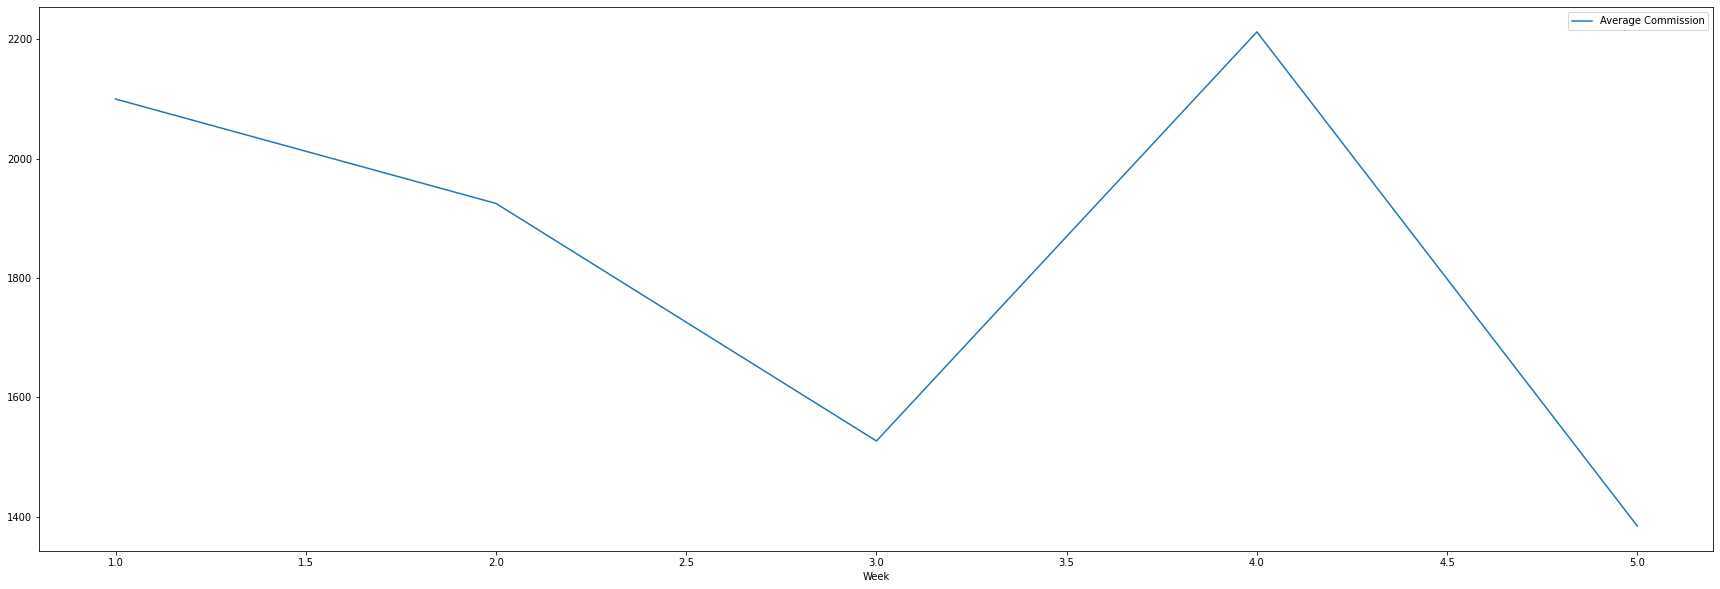

In [18]:
#getting the values for specific months
com_jan = com_mth[com_mth['Month']==1]
com_jan = com_jan.sort_values(by='Week')
com_jan = com_jan.drop(columns=['Month'])
com_jan

#getting the values for each week
wk1 = com_jan[com_jan['Week']=='1']
wk1

wk2 = com_jan[com_jan['Week']=='2']
wk2

wk3 = com_jan[com_jan['Week']=='3']
wk3 

wk4 = com_jan[com_jan['Week']=='4']
wk4

wk5 = com_jan[com_jan['Week']=='5']
wk5
#comm_graph = commission_monthly.plot.bar(x='Month', y='Commision Earned', figsize=(30,10))


#getting the average for each week, putting it into a line graph to see a trendline
wk2['Commision Earned'].mean()
wk3['Commision Earned'].mean()
wk4['Commision Earned'].mean()
wk5['Commision Earned'].mean()

d = {'Week': [1, 2, 3, 4, 5], 
     'Average Commission': [ wk1['Commision Earned'].mean(),
                             wk2['Commision Earned'].mean(),
                             wk3['Commision Earned'].mean(),
                             wk4['Commision Earned'].mean(),
                             wk5['Commision Earned'].mean()]}

janAvgComm = pd.DataFrame(data=d)
janAvgComm
janAvg_graph = janAvgComm.plot.line(x='Week', y='Average Commission', figsize=(30,10))

In [19]:
com_jan

,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
0,1,Marlone Awillie,Moses Wejulu,Mechanisation,Ploughing,21.00,2100.0,58800.0,5.0
2,2,Florence Nabwire,Michael Ochieng,Mechanisation,Ploughing,8.00,800.0,22400.0,4.0
6,2,Samson Opiyo,Peter Ruto,Mechanisation,Ploughing,10.00,1000.0,30000.0,5.0
10,2,Alfred Mwanthi,Gituura,Mechanisation,Threshing,264.00,10300.0,66000.0,26.0
5,2,Ruth Wandera,Lydia Makori,Mechanisation,Ploughing,11.00,1100.0,27500.0,1.0
8,2,Willis Omondi,Quipbank,Mechanisation,Ploughing,12.00,1200.0,36000.0,6.0
1,2,Amos Magero,Peter Wanga,Mechanisation,Ploughing,13.00,1300.0,36400.0,4.0
7,2,Geoffrey Kungu,Quipbank,Mechanisation,Ploughing,24.00,2400.0,72000.0,5.0
3,2,Elder Mariamu Omurayi,Trix Magoba,Mechanisation,Ploughing,3.00,300.0,7500.0,3.0
4,2,Shadrack Okuku,Trix Magoba,Mechanisation,Ploughing,1.00,100.0,2800.0,1.0


In [20]:
com_jan.min()
com_jan.max()

Week                                     1
fscName                      Agnes kathure
serviceProviderName          Andrew Abongo
serviceProvided              Mechanisation
type                            Irrigation
Acres/ Bags/Samples/Pumps              1.0
Commision Earned                     100.0
Value                                300.0
Total                                  1.0
dtype: object

Week                                      5
fscName                       Willis Omondi
serviceProviderName             Ugenya TVET
serviceProvided              Other Services
type                              Threshing
Acres/ Bags/Samples/Pumps             264.0
Commision Earned                    10300.0
Value                              485000.0
Total                                  26.0
dtype: object

In [21]:
#find the amount of services provided by each FSC
com_jan.groupby('fscName')['type'].nunique()

fscName
Agnes kathure             1
Alfred Mwanthi            1
Amos Magero               1
Andrew Oywa               1
David onyunde             1
Elder Mariamu Omurayi     1
Elphas Owiti              1
Emilly Akinyi             1
Everlene Ouma             1
Florence Nabwire          1
Geoffrey Kungu            1
Grace Okello              1
Henderica Okwayo          1
Ignatius Makanda          1
Jacinta Adhaya Ochieng    1
Jane Kisia                1
John Ouko                 1
Joseph Ngungi             1
Josphat Mukembu           1
Judith Oketch             1
Julia Marungu             1
Julius Oker               1
Magdalene Kiarie          1
Marlone Awillie           1
Noah Rono                 1
Patrick Musuja            1
Rose Ndolo                1
Rose Wagari               1
Roseline Syama            1
Ruth Wandera              1
Samson Opiyo              1
Shadrack Okuku            1
Sylvester Owino           1
Washington Obiero         1
Willis Omondi             1
Name: type, 

In [22]:
ServPJan = com_jan.groupby('fscName')['type'].nunique().reset_index()
ServPJan

,fscName,type
0,Agnes kathure,1
1,Alfred Mwanthi,1
2,Amos Magero,1
3,Andrew Oywa,1
4,David onyunde,1
5,Elder Mariamu Omurayi,1
6,Elphas Owiti,1
7,Emilly Akinyi,1
8,Everlene Ouma,1
9,Florence Nabwire,1


In [23]:
#Find the number of services provided in the month for each type
demandJan = com_jan.groupby('type')['fscName'].nunique().reset_index()
demandJan

,type,fscName
0,Irrigation,1
1,Ploughing,27
2,Soil Testing,1
3,Spraying,5
4,Threshing,1


# FEBRUARY <a class="anchor" id="feb"></a>

,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
65,1,Rose Wagari,Soil Cares,Other Services,Soil Testing,4.0,2000.0,6000.0,1.0
58,1,Richard Oyongo,Mrs. Omao,Mechanisation,Ploughing,13.0,2600.0,35100.0,8.0
59,1,Nicholas Owiti,NYS,Mechanisation,Ploughing,16.0,3200.0,48000.0,8.0
60,1,Ibrahim Lutta,Robert Wanguba,Mechanisation,Ploughing,14.0,1400.0,39200.0,2.0
64,1,Jane Karugu,Golden Farm Soil Cares,Other Services,Soil Testing,3.0,600.0,3000.0,3.0
...,...,...,...,...,...,...,...,...,...
160,4,Benjamin Wanguba,Robert Wanguba,Mechanisation,Ploughing,3.0,300.0,8400.0,2.0
161,4,Vincent Kamau,Okune,Mechanisation,Ploughing,3.0,300.0,8400.0,2.0
159,4,Thomas Makanga,Okune,Mechanisation,Ploughing,3.0,300.0,8400.0,3.0
131,4,Amos Magero,Kennedy Owano,Mechanisation,Ploughing,28.0,2400.0,78400.0,17.0


,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
65,1,Rose Wagari,Soil Cares,Other Services,Soil Testing,4.0,2000.0,6000.0,1.0
58,1,Richard Oyongo,Mrs. Omao,Mechanisation,Ploughing,13.0,2600.0,35100.0,8.0
59,1,Nicholas Owiti,NYS,Mechanisation,Ploughing,16.0,3200.0,48000.0,8.0
60,1,Ibrahim Lutta,Robert Wanguba,Mechanisation,Ploughing,14.0,1400.0,39200.0,2.0
64,1,Jane Karugu,Golden Farm Soil Cares,Other Services,Soil Testing,3.0,600.0,3000.0,3.0
66,1,Sylvester Owino,Ugenya TVET,Mechanisation,Ploughing,10.0,1000.0,26000.0,1.0
63,1,Rose Ndolo,Peter Ochieng,Mechanisation,Ploughing,20.0,2000.0,60000.0,20.0
57,1,Richard Oyongo,Mrs. Omao,Mechanisation,Ploughing,8.0,1600.0,21600.0,8.0
61,1,Jacinta Adhaya Ochieng,Joseph Odhiambo,Mechanisation,Ploughing,10.0,1000.0,30000.0,9.0
62,1,Hagai Nido,Peter Ochieng,Mechanisation,Ploughing,10.0,1000.0,30000.0,10.0


,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
78,2,Samson Sawo,Tawa,Mechanisation,Ploughing,27.00,2700.0,81000.0,10.0
76,2,Samson Opiyo,Peter Ruto,Mechanisation,Ploughing,10.00,1000.0,30000.0,10.0
85,2,David onyunde,Charles Odhiambo,Mechanisation,Ploughing,51.25,5125.0,153750.0,9.0
88,2,David Mwikamba,Peter,Other Services,Thresher(Equipment),1.00,0.0,67000.0,1.0
70,2,Maurice Otach,Jashon,Mechanisation,Ploughing,5.00,500.0,15000.0,3.0
75,2,Ayub Owiti,Oloo Bonyo,Mechanisation,Ploughing,30.00,3000.0,90000.0,4.0
68,2,Peter Ayieko,Jashon,Mechanisation,Ploughing,15.00,3000.0,45000.0,13.0
71,2,Richard Oyongo,Mrs. Omao,Mechanisation,Ploughing,20.00,4000.0,54000.0,21.0
69,2,Lazarus Owade,Jashon,Mechanisation,Ploughing,11.00,1100.0,33000.0,6.0
82,2,Washington Obiero,Koech Kiprotich,Mechanisation,Ploughing,39.00,3900.0,117000.0,21.0


,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
104,3,Martin Makokha,James Makokha,Mechanisation,Ploughing,3.50,350.0,9800.0,2.0
115,3,Elphas Owiti,Chris,Mechanisation,Ploughing,12.00,1200.0,33600.0,2.0
91,3,Peter Ayieko,Ayoo,Mechanisation,Ploughing,7.00,1400.0,21000.0,2.0
117,3,Boaz Were,Joshua,Mechanisation,Ploughing,21.00,2100.0,94500.0,9.0
121,3,Stephen Kamau,Golden Farm Soil Cares,Other Services,Soil Testing,6.00,1200.0,6000.0,6.0
111,3,Hagai Nido,Peter Ochieng,Mechanisation,Ploughing,12.00,1200.0,36000.0,7.0
114,3,John Nyamburi,NIA Society,Mechanisation,Ploughing,25.00,2500.0,100000.0,18.0
122,3,Rose Wagari,Golden Farm Soil Cares,Other Services,Soil Testing,10.00,2000.0,10000.0,10.0
89,3,Nicholas Owiti,NYS,Mechanisation,Ploughing,100.00,20000.0,300000.0,33.0
109,3,Willis Omondi,Quipbank,Mechanisation,Ploughing,12.00,1200.0,36000.0,12.0


,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
144,4,Shadrack Okuku,Mary Nafula,Mechanisation,Ploughing,17.0,1700.0,47600.0,8.0
140,4,Julia Marungu,Peter Ademba,Mechanisation,Ploughing,15.0,1500.0,42000.0,9.0
199,4,Shadrack Okuku,Mary Nafula,Mechanisation,Ploughing,17.0,1700.0,47600.0,8.0
195,4,Julia Marungu,Peter Ademba,Mechanisation,Ploughing,15.0,1500.0,42000.0,9.0
185,4,Amos Magero,Lydia Makori,Mechanisation,Ploughing,12.0,1200.0,33600.0,8.0
...,...,...,...,...,...,...,...,...,...
160,4,Benjamin Wanguba,Robert Wanguba,Mechanisation,Ploughing,3.0,300.0,8400.0,2.0
161,4,Vincent Kamau,Okune,Mechanisation,Ploughing,3.0,300.0,8400.0,2.0
159,4,Thomas Makanga,Okune,Mechanisation,Ploughing,3.0,300.0,8400.0,3.0
131,4,Amos Magero,Kennedy Owano,Mechanisation,Ploughing,28.0,2400.0,78400.0,17.0


,Week,Average Commission
0,6,1640.000000
1,7,1700.000000
2,8,2111.153846
3,9,2803.472222


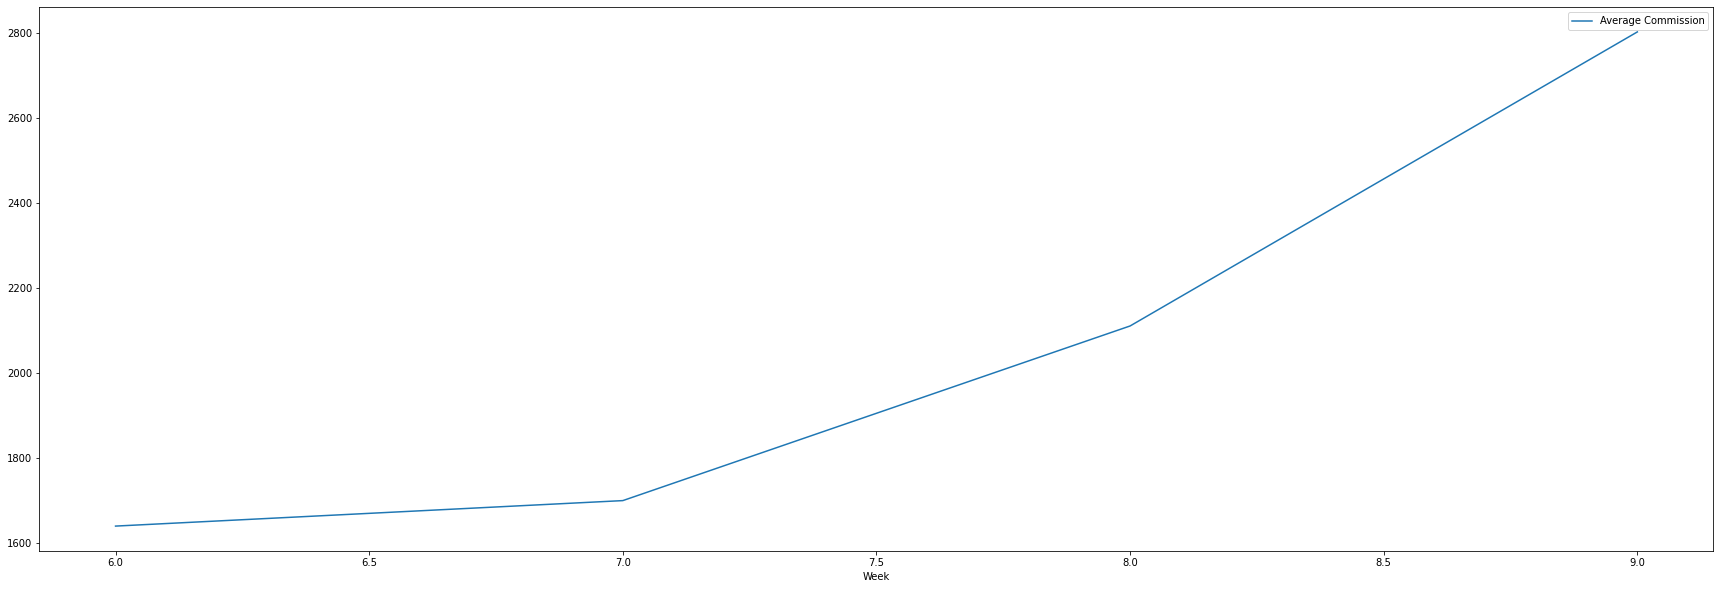

In [24]:
#getting the values for specific months
com_feb = com_mth[com_mth['Month']==2]
com_feb = com_feb.sort_values(by='Week')
com_feb = com_feb.drop(columns=['Month'])
com_feb

#getting the values for each week
wk1 = com_feb[com_feb['Week']=='1']
wk1

wk2 = com_feb[com_feb['Week']=='2']
wk2

wk3 = com_feb[com_feb['Week']=='3']
wk3 

wk4 = com_feb[com_feb['Week']=='4']
wk4


d = {'Week': [6, 7, 8, 9], 
     'Average Commission': [ wk1['Commision Earned'].mean(),
                             wk2['Commision Earned'].mean(),
                             wk3['Commision Earned'].mean(),
                             wk4['Commision Earned'].mean()]}

febAvgComm = pd.DataFrame(data=d)
febAvgComm
febAvg_graph = febAvgComm.plot.line(x='Week', y='Average Commission', figsize=(30,10))

In [25]:
com_feb.min()
com_feb.max()

Week                                     1
fscName                      Alex Macharia
serviceProviderName               Agrimech
serviceProvided              Mechanisation
type                             Harrowing
Acres/ Bags/Samples/Pumps              1.0
Commision Earned                       0.0
Value                                600.0
Total                                  1.0
dtype: object

Week                                      4
fscName                      martin Makokha
serviceProviderName                  luore 
serviceProvided              Other Services
type                              Threshing
Acres/ Bags/Samples/Pumps             554.0
Commision Earned                    36000.0
Value                              540000.0
Total                                  43.0
dtype: object

In [26]:
com_feb.groupby('fscName')['type'].nunique()

fscName
Alex Macharia        1
Alfred Mwanthi       1
Ali Otini            1
Amos Magero          2
Andrew Oywa          1
                    ..
Thomas Makanga       1
Vincent Kamau        1
Washington Obiero    1
Willis Omondi        1
martin Makokha       1
Name: type, Length: 67, dtype: int64

In [27]:
ServPFeb = com_feb.groupby('fscName')['type'].nunique().reset_index()
ServPFeb

,fscName,type
0,Alex Macharia,1
1,Alfred Mwanthi,1
2,Ali Otini,1
3,Amos Magero,2
4,Andrew Oywa,1
...,...,...
62,Thomas Makanga,1
63,Vincent Kamau,1
64,Washington Obiero,1
65,Willis Omondi,1


In [28]:
#Find the number of services provided in the month for each type
com_feb.groupby('type')['fscName'].nunique()

type
Harrowing               1
Ploughing              57
Soil Testing            4
Spraying                3
Thresher(Equipment)     2
Threshing               5
Name: fscName, dtype: int64

In [29]:
demandFeb = com_feb.groupby('type')['fscName'].nunique().reset_index()
demandFeb

,type,fscName
0,Harrowing,1
1,Ploughing,57
2,Soil Testing,4
3,Spraying,3
4,Thresher(Equipment),2
5,Threshing,5


# MARCH <a class="anchor" id="mar"></a>

,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
226,1,Kephers Ogola,Njoroge,Mechanisation,Ploughing,20.0,0.0,80000.0,10.0
225,1,Mathew Mbeka,Ahero NIB,Mechanisation,Ploughing,20.0,2000.0,60000.0,20.0
202,1,Grace Okello,Nandi Operators,Mechanisation,Ploughing,32.0,4800.0,96000.0,11.0
249,1,Grace Okello,Nandi Operators,Mechanisation,Ploughing,32.0,4800.0,96000.0,11.0
238,1,Sammy Sang,Kitur Joel,Mechanisation,Ploughing,20.0,2000.0,50000.0,8.0
...,...,...,...,...,...,...,...,...,...
430,4,Daniel Kogai,Ouma,Mechanisation,Ploughing,5.0,500.0,16000.0,6.0
442,4,Noah Rono,Kitur Joel,Mechanisation,Ploughing,5.0,500.0,12500.0,1.0
405,4,Ignatius Makanda,Conrad Okatch,Mechanisation,Ploughing,5.0,500.0,14000.0,5.0
409,4,Roseline Syama,Bunyala TVET,Mechanisation,Planting,18.0,1800.0,45000.0,12.0


,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
226,1,Kephers Ogola,Njoroge,Mechanisation,Ploughing,20.0,0.0,80000.0,10.0
225,1,Mathew Mbeka,Ahero NIB,Mechanisation,Ploughing,20.0,2000.0,60000.0,20.0
202,1,Grace Okello,Nandi Operators,Mechanisation,Ploughing,32.0,4800.0,96000.0,11.0
249,1,Grace Okello,Nandi Operators,Mechanisation,Ploughing,32.0,4800.0,96000.0,11.0
238,1,Sammy Sang,Kitur Joel,Mechanisation,Ploughing,20.0,2000.0,50000.0,8.0
...,...,...,...,...,...,...,...,...,...
219,1,Vincent Kamau,Okune,Mechanisation,Ploughing,10.0,1000.0,28000.0,5.0
248,1,Ignatius Makanda,Simon Asuka,Mechanisation,Ploughing,14.0,1400.0,39200.0,10.0
224,1,Jacinta Adhaya Ochieng,Joseph Odhiambo,Mechanisation,Ploughing,10.0,1000.0,30000.0,10.0
231,1,Samson Opiyo,Ruto,Mechanisation,Ploughing,10.0,1000.0,30000.0,4.0


,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
281,2,Martin Makokha,Wellington Chumba,Mechanisation,Ploughing,25.0,2500.0,70000.0,1.0
296,2,Richard Mbaria,Julius Wambungu,Mechanisation,Ploughing,10.0,1000.0,25000.0,3.0
280,2,Benjamin Wanguba,Robert Wanguba,Mechanisation,Ploughing,10.0,1000.0,28000.0,6.0
283,2,Willis Omondi,Quipbank,Mechanisation,Ploughing,21.0,2100.0,63000.0,19.0
332,2,Elder Mariamu Omurayi,Trix Magoba,Mechanisation,Ploughing,21.0,2100.0,58800.0,8.0
...,...,...,...,...,...,...,...,...,...
321,2,Ruth Wandera,Peter Ademba,Mechanisation,Ploughing,9.0,900.0,25200.0,8.0
311,2,Martin Oloo Juma,Meja,Mechanisation,Ploughing,92.5,9250.0,277500.0,28.0
315,2,Susan Sewe,George,Mechanisation,Planting,94.0,9400.0,282000.0,38.0
335,2,John Ouko,Stephene Omadir,Mechanisation,Ploughing,8.0,800.0,22400.0,3.0


,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
350,3,Joseph Nyalando,Agrimech,Mechanisation,Ploughing,8.0,1600.0,24000.0,5.0
358,3,Samson Opiyo,Peter Ruto,Mechanisation,Ploughing,3.0,300.0,9000.0,2.0
340,3,Julia Marungu,Peter Wanga,Mechanisation,Ploughing,17.0,1700.0,47600.0,2.0
379,3,Julia Marungu,Peter Wanga,Mechanisation,Ploughing,17.0,1700.0,47600.0,2.0
390,3,Jason Maragu,Agrimech,Mechanisation,Chiseling,35.0,5250.0,70000.0,27.0
348,3,Fredrick Andera,Nandi Operators,Mechanisation,Ploughing,19.0,1900.0,53200.0,6.0
391,3,John Koileken,PMSP,Mechanisation,Ripping,6.0,600.0,14400.0,4.0
383,3,Ruth Wandera,Lydia Makori,Mechanisation,Ploughing,8.0,800.0,22400.0,2.0
374,3,Peter Kiragu,Golden Farm Soil Cares,Other Services,Soil Testing,6.0,1200.0,6000.0,6.0
344,3,Ruth Wandera,Lydia Makori,Mechanisation,Ploughing,8.0,800.0,22400.0,2.0


,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
439,4,John Nyamburi,Nick,Mechanisation,Ploughing,6.0,1200.0,24000.0,3.0
411,4,Amos Magero,Bunyala TVET,Mechanisation,Planting,12.0,1200.0,30000.0,6.0
431,4,Rose Ndolo,Peter Ochieng,Mechanisation,Ploughing,10.0,1000.0,30000.0,5.0
397,4,Morris Olaba,Trix Magoba,Mechanisation,Ploughing,13.0,1300.0,32500.0,5.0
400,4,John Ouko,Stephene Omadir,Mechanisation,Ploughing,11.0,1100.0,30800.0,6.0
410,4,Amos Magero,Lydia Makori,Mechanisation,Ploughing,11.0,1100.0,30800.0,9.0
444,4,Alex Macharia,Waweru paul,Mechanisation,Ploughing,10.0,1000.0,25000.0,5.0
433,4,Andrew Oywa,NIB,Mechanisation,Ploughing,10.0,1000.0,30000.0,5.0
434,4,Andrew Oywa,Ruto,Mechanisation,Ploughing,10.0,1000.0,30000.0,7.0
436,4,Jane Kisia,luore,Mechanisation,Ploughing,10.0,1000.0,30000.0,9.0


,Week,Average Commission
0,10,2671.311475
1,11,3301.600000
2,12,1492.711864
3,13,2418.333333


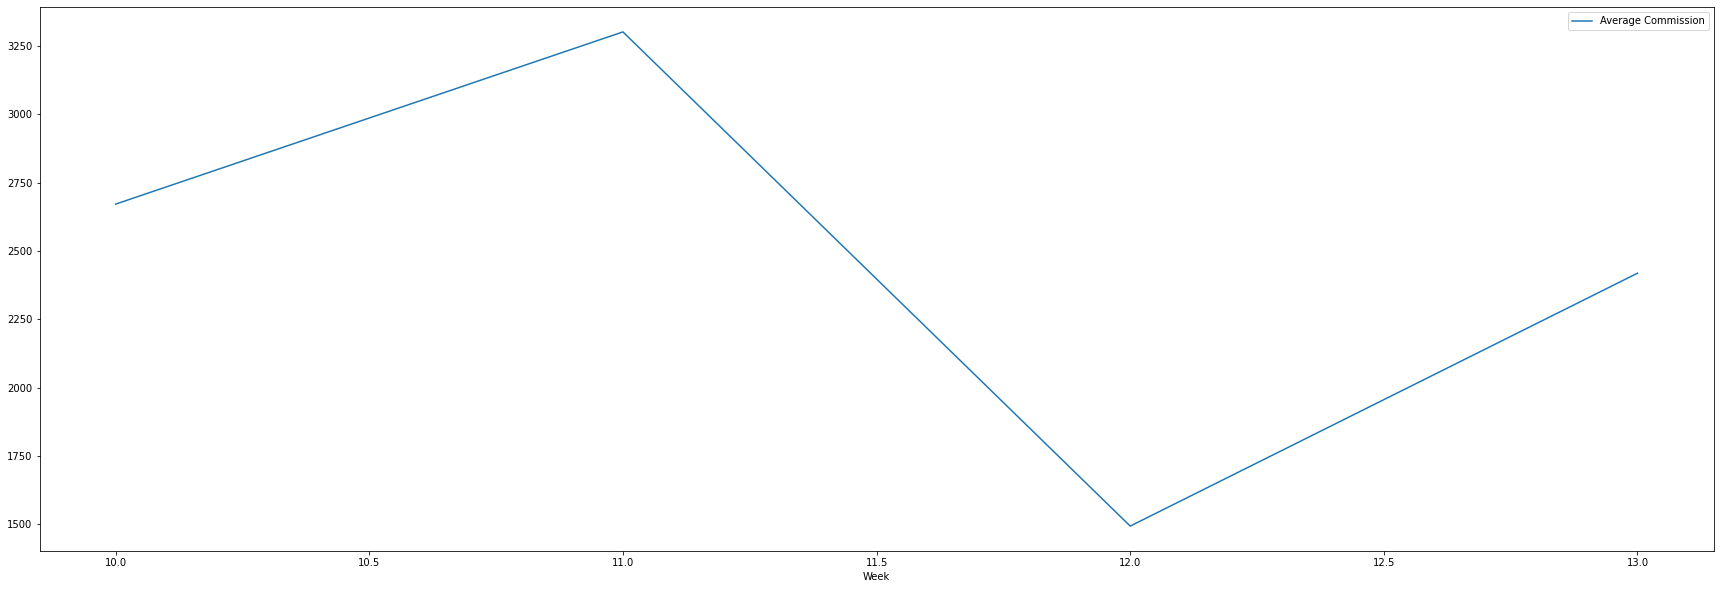

In [30]:
#getting the values for specific months
com_mar = com_mth[com_mth['Month']==3]
com_mar = com_mar.sort_values(by='Week')
com_mar = com_mar.drop(columns=['Month'])
com_mar

#getting the values for each week
wk1 = com_mar[com_mar['Week']=='1']
wk1

wk2 = com_mar[com_mar['Week']=='2']
wk2

wk3 = com_mar[com_mar['Week']=='3']
wk3 

wk4 = com_mar[com_mar['Week']=='4']
wk4

d = {'Week': [10, 11, 12, 13], 
     'Average Commission': [ wk1['Commision Earned'].mean(),
                             wk2['Commision Earned'].mean(),
                             wk3['Commision Earned'].mean(),
                             wk4['Commision Earned'].mean()]}

marAvgComm = pd.DataFrame(data=d)
marAvgComm
marAvg_graph = marAvgComm.plot.line(x='Week', y='Average Commission', figsize=(30,10))

In [31]:
com_mar.min()
com_mar.max()

Week                                                                1
fscName                                                 Agnes Kathure
serviceProviderName          Agricultural Mechanization Station (AMS)
serviceProvided                                         Mechanisation
type                                                        Chiseling
Acres/ Bags/Samples/Pumps                                         1.0
Commision Earned                                                  0.0
Value                                                          1050.0
Total                                                             1.0
dtype: object

Week                                      4
fscName                       Willis Omondi
serviceProviderName                  sanora
serviceProvided              Other Services
type                              Threshing
Acres/ Bags/Samples/Pumps             300.0
Commision Earned                    47500.0
Value                              804000.0
Total                                  81.0
dtype: object

In [32]:
#Find the number of services provided in the month for each type
com_mar.groupby('type')['fscName'].nunique()

type
Chiseling          1
Harrowing          2
Irrigation         1
Planting           8
Ploughing         73
Ridging            1
Ripping            8
Silage cutting     1
Soil Testing       5
Spraying           4
Threshing          4
Name: fscName, dtype: int64

In [33]:
ServPMar = com_mar.groupby('fscName')['type'].nunique().reset_index()
ServPMar

,fscName,type
0,Agnes Kathure,1
1,Alex Macharia,3
2,Alfred Mwanthi,2
3,Amos Magero,4
4,Andrew Oywa,1
...,...,...
79,Sylvester Owino,1
80,Vincent Kamau,1
81,Washington Obiero,1
82,Watson Wachira,1


In [34]:
com_mar.groupby('fscName')['type'].nunique()

fscName
Agnes Kathure        1
Alex Macharia        3
Alfred Mwanthi       2
Amos Magero          4
Andrew Oywa          1
                    ..
Sylvester Owino      1
Vincent Kamau        1
Washington Obiero    1
Watson Wachira       1
Willis Omondi        1
Name: type, Length: 84, dtype: int64

In [35]:
demandMar = com_mar.groupby('type')['fscName'].nunique().reset_index()
demandMar

,type,fscName
0,Chiseling,1
1,Harrowing,2
2,Irrigation,1
3,Planting,8
4,Ploughing,73
5,Ridging,1
6,Ripping,8
7,Silage cutting,1
8,Soil Testing,5
9,Spraying,4


In [36]:
# FIRST QUARTER AVERAGE  <a class="anchor" id="fqa"></a>

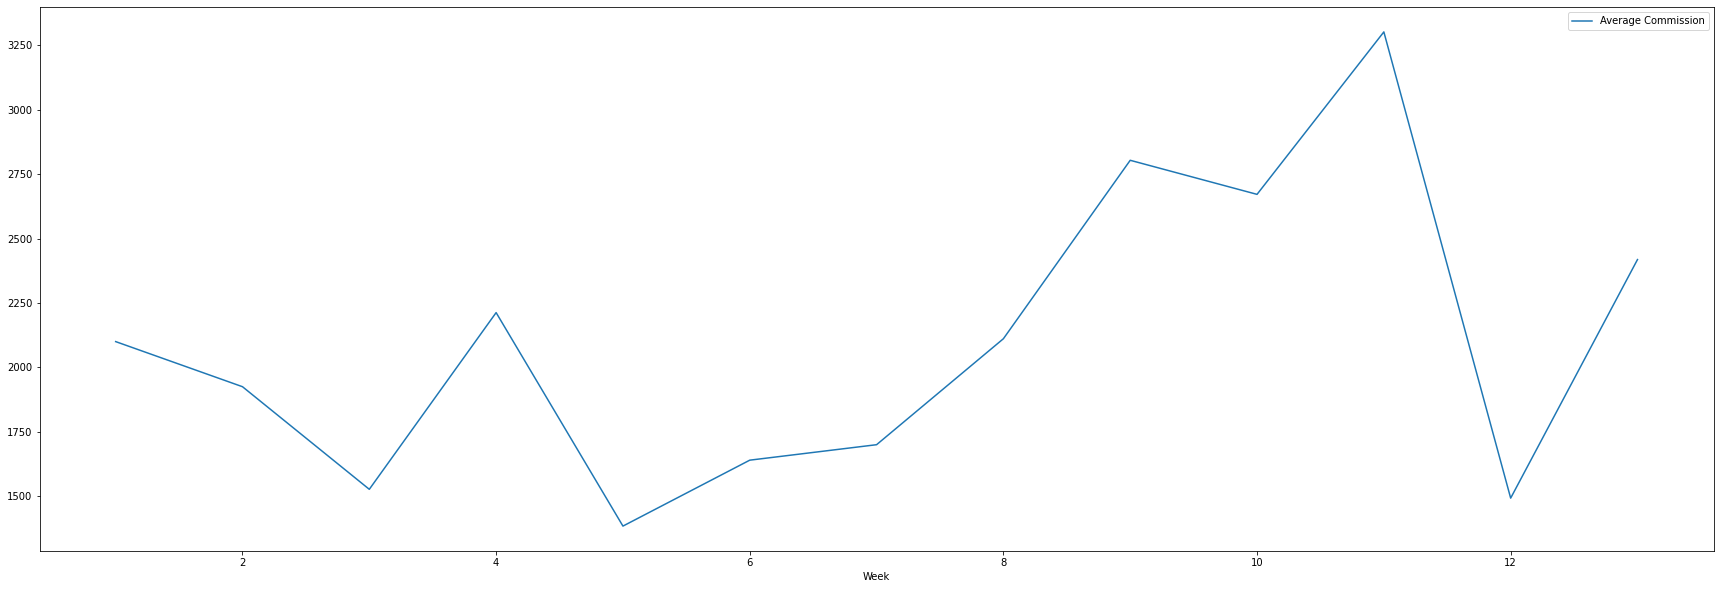

In [37]:
firstQuarter = [janAvgComm, febAvgComm, marAvgComm]

firstQ = pd.concat(firstQuarter)

firstQgraph = firstQ.plot.line(x='Week', y='Average Commission', figsize=(30,10))



In [38]:
#ServPJan
#ServPFeb
#ServPMar

#ServQ1 = pd.merge(ServPJan, ServPFeb, ServPMar, on=['fscName', 'type']).set_index(['fscName']).sum(axis=0)

providedQ1 = ServPJan.merge(ServPFeb,on=['fscName']).merge(ServPMar,on=['fscName'])
providedQ1

,fscName,type_x,type_y,type
0,Alfred Mwanthi,1,1,2
1,Amos Magero,1,2,4
2,Andrew Oywa,1,1,1
3,Elder Mariamu Omurayi,1,1,4
4,Elphas Owiti,1,1,1
5,Emilly Akinyi,1,1,1
6,Florence Nabwire,1,1,2
7,Henderica Okwayo,1,2,1
8,Jacinta Adhaya Ochieng,1,1,1
9,Jane Kisia,1,1,1


# APRIL <a class="anchor" id="apr"></a>

,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
495,1,Peter Wambi,County Government,Mechanisation,Harrowing,96.0,9600.0,153600.0,24.0
596,4,Nicholas Owiti,Agrimech,Mechanisation,Ripping,47.0,9400.0,117500.0,17.0
598,4,Peter Adede,Agrimech,Mechanisation,Ploughing,45.0,9000.0,135000.0,8.0
499,1,Emilly Akinyi,SSP,Other Services,Spraying,18.0,900.0,13500.0,6.0
461,1,Roseline Syama,Bunyala TVET,Mechanisation,Planting,9.0,900.0,22500.0,7.0
...,...,...,...,...,...,...,...,...,...
622,5,Lucas Onyango,SSP,Other Services,Spraying,2.0,100.0,1500.0,1.0
565,3,Wycliffe Bet,Wesley Koech,Mechanisation,Ploughing,2.0,100.0,5200.0,1.0
560,3,Collins Rotich,Rotich Collins,Mechanisation,Planting,18.0,1800.0,27000.0,9.0
606,4,Florence Nabwire,SSP,Other Services,Spraying,20.0,0.0,8000.0,5.0


,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
495,1,Peter Wambi,County Government,Mechanisation,Harrowing,96.0,9600.0,153600.0,24.0
499,1,Emilly Akinyi,SSP,Other Services,Spraying,18.0,900.0,13500.0,6.0
461,1,Roseline Syama,Bunyala TVET,Mechanisation,Planting,9.0,900.0,22500.0,7.0
484,1,Peter Wambi,County Government,Mechanisation,Ploughing,89.0,8900.0,186900.0,27.0
511,1,Peter Wambi,County Government,Mechanisation,Harrowing,87.0,8700.0,139200.0,27.0
...,...,...,...,...,...,...,...,...,...
505,1,David Onyunde,Bunyala TVET,Mechanisation,Planting,101.0,10100.0,252500.0,51.0
518,1,Benson Kesier,PMSP,Mechanisation,Ripping,10.0,1000.0,24000.0,2.0
482,1,Abraham Nganga,Golden Farm Soil Cares,Other Services,Soil Testing,1.0,1000.0,2500.0,1.0
470,1,Elphas Owiti,Quipbank,Mechanisation,Ploughing,10.0,1000.0,29000.0,5.0


,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
546,2,James Olum,SSP,Other Services,Spraying,17.00,850.0,12750.0,7.0
528,2,Joseph Koech,Kitur Joel,Mechanisation,Ploughing,5.50,825.0,13200.0,2.0
554,2,Francis Oduor,SSP,Other Services,Spraying,15.00,750.0,11250.0,4.0
547,2,Emilly Akinyi,Dr. Habil,Other Services,Spraying,67.00,6700.0,50250.0,19.0
539,2,David Onyunde,Ugenya TVET,Mechanisation,Planting,61.00,6100.0,152500.0,16.0
526,2,Alex Macharia,Kitur Joel,Mechanisation,Ridging,6.00,600.0,9000.0,1.0
525,2,Alex Macharia,Kitur Joel,Mechanisation,Ploughing,6.00,600.0,15000.0,1.0
544,2,Samuel Otana Mawere,Jalang'o,Mechanisation,Planting,59.00,5900.0,153400.0,21.0
551,2,Judith Oketch,Ugenya TVET,Mechanisation,Harrowing,51.00,5100.0,127500.0,14.0
556,2,John Koileken,PMSP,Mechanisation,Ripping,5.00,500.0,12000.0,2.0


,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
578,3,Benson Kesier,PMSP,Mechanisation,Ripping,7.0,700.0,16800.0,2.0
576,3,David Onyunde,SSP,Other Services,Spraying,13.0,650.0,9750.0,1.0
568,3,Ayub Owiti,Ochieng Adala,Mechanisation,Ploughing,30.0,6000.0,120000.0,30.0
569,3,Ayub Owiti,Adala,Mechanisation,Harrowing,30.0,6000.0,120000.0,30.0
581,3,Julia Marungu,SSP,Other Services,Spraying,4.0,400.0,2000.0,2.0
570,3,Julius Oker,Jacob Ouma,Mechanisation,Ploughing,4.0,400.0,12000.0,1.0
557,3,Watson Wachira,Kagunda,Mechanisation,Ploughing,1.0,400.0,4000.0,1.0
577,3,Benson Kesier,PMSP,Mechanisation,Ploughing,60.0,3000.0,150000.0,16.0
572,3,Julius Oker,Julius Oker,Other Services,Spraying,3.0,300.0,2550.0,2.0
562,3,Joseph Koech,Joseph Koech,Other Services,Spraying,3.0,300.0,900.0,2.0


,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
596,4,Nicholas Owiti,Agrimech,Mechanisation,Ripping,47.00,9400.0,117500.0,17.0
598,4,Peter Adede,Agrimech,Mechanisation,Ploughing,45.00,9000.0,135000.0,8.0
603,4,Nickolas Odiwuor,john koech,Mechanisation,Ploughing,39.00,7800.0,136500.0,16.0
593,4,Maurice Otach,Joseph Mwanyi,Mechanisation,Ploughing,3.00,600.0,9000.0,1.0
582,4,David Onyunde,SSP,Other Services,Spraying,10.00,500.0,7500.0,7.0
599,4,Joseph Nyalando,kiprotich,Mechanisation,Ploughing,216.00,43200.0,648000.0,73.0
600,4,Paul Mao,kiprotich,Mechanisation,Ploughing,21.00,4200.0,63000.0,7.0
588,4,Micah Okoth,Dr. Habil,Mechanisation,Planting,2.00,400.0,10400.0,1.0
585,4,Emilly Akinyi,SSP,Other Services,Spraying,6.00,300.0,4500.0,3.0
586,4,Alice Atieno Anjinja,Dr. Habil,Mechanisation,Planting,3.00,300.0,7800.0,3.0


,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
623,5,Emilly Akinyi,SSP,Other Services,Spraying,13.0,650.0,8450.0,3.0
610,5,Robert Koskei,Kitur Joel,Mechanisation,Ploughing,4.0,400.0,10000.0,1.0
615,5,Kephers Ogola,Odhiambo Okinda,Other Services,Spraying,9.0,3600.0,3600.0,9.0
624,5,David Onyunde,SSP,Other Services,Spraying,7.0,350.0,5250.0,5.0
611,5,Alex Macharia,Macharia,Other Services,Spraying,10.0,300.0,3000.0,4.0
621,5,David Onyunde,SSP,Other Services,Spraying,6.0,300.0,4500.0,2.0
613,5,Samson Opiyo,Samson Opiyo,Other Services,Spraying,70.0,28000.0,28000.0,12.0
617,5,Micah Okoth,Dr. Habil,Mechanisation,Ploughing,23.0,2300.0,69000.0,9.0
609,5,Alex Macharia,Alex Macharia,Other Services,Spraying,20.0,2000.0,6000.0,11.0
608,5,Noah Rono,Noah Rono,Other Services,Spraying,2.0,200.0,600.0,1.0


,Week,Average Commission
0,14,3163.671875
1,15,4571.621622
2,16,2514.000000
3,17,8879.807692
4,18,3708.823529


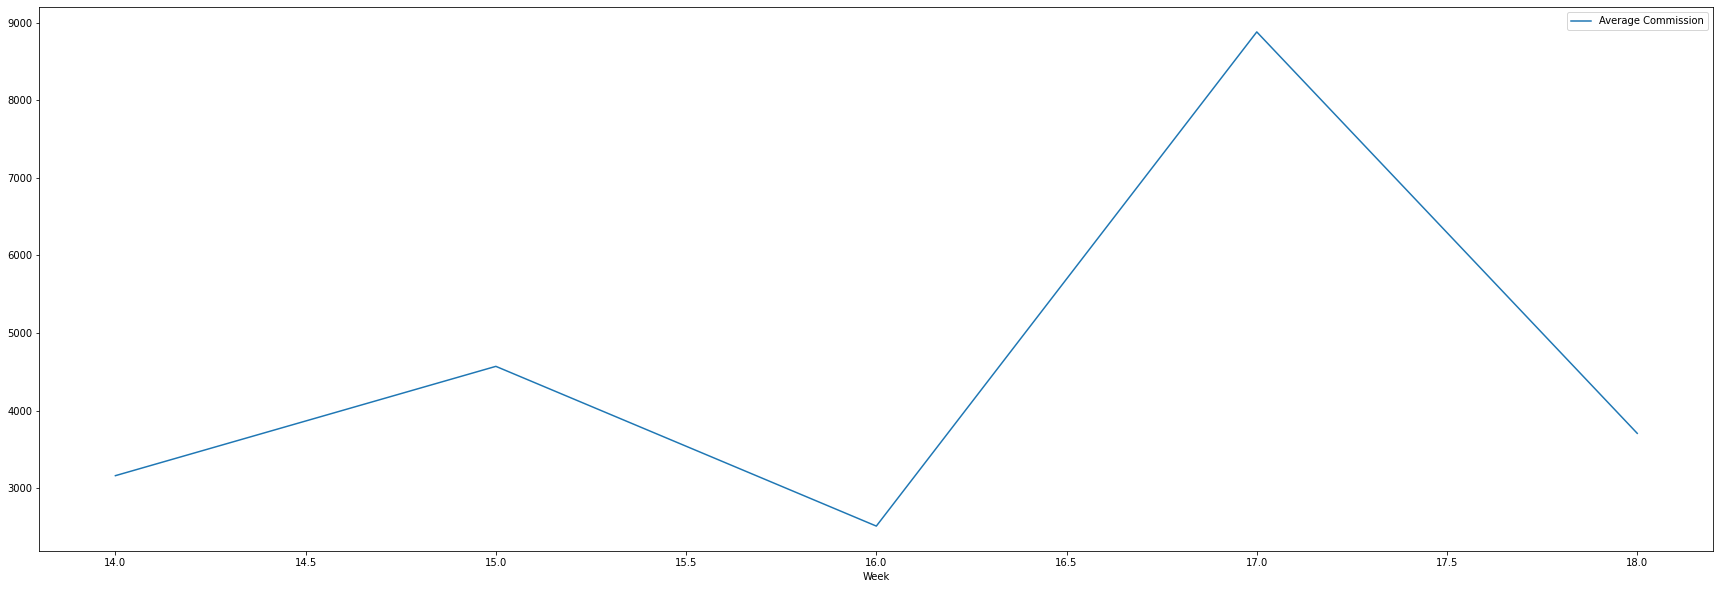

In [39]:
#getting the values for specific months
com_apr = com_mth[com_mth['Month']==4]
com_apr = com_apr.drop(columns=['Month'])
com_apr

#getting the values for each week
wk1 = com_apr[com_apr['Week']=='1']
wk1

wk2 = com_apr[com_apr['Week']=='2']
wk2

wk3 = com_apr[com_apr['Week']=='3']
wk3 

wk4 = com_apr[com_apr['Week']=='4']
wk4

wk5 = com_apr[com_apr['Week']=='5']
wk5

d = {'Week': [14, 15, 16, 17, 18], 
     'Average Commission': [ wk1['Commision Earned'].mean(),
                             wk2['Commision Earned'].mean(),
                             wk3['Commision Earned'].mean(),
                             wk4['Commision Earned'].mean(),
                             wk5['Commision Earned'].mean()]}

aprAvgComm = pd.DataFrame(data=d)
aprAvgComm
aprAvg_graph = aprAvgComm.plot.line(x='Week', y='Average Commission', figsize=(30,10))

In [40]:
com_apr.min()
com_apr.max()

fscName                      Abraham Nganga
serviceProviderName                   Adala
serviceProvided               Mechanisation
type                              Chiseling
Acres/ Bags/Samples/Pumps               1.0
Commision Earned                        0.0
Value                                 600.0
Total                                   1.0
dtype: object

fscName                        Wycliffe Bet
serviceProviderName                s. Kamau
serviceProvided              Other Services
type                               Spraying
Acres/ Bags/Samples/Pumps             216.0
Commision Earned                    47000.0
Value                              648000.0
Total                                  73.0
dtype: object

In [41]:
#Find the number of services provided in the month for each type
com_apr.groupby('type')['fscName'].nunique()

type
Chiseling        1
Harrowing       13
Planting        16
Ploughing       56
Ridging          4
Ripping          7
Rotavation       1
Soil Testing     5
Spraying        20
Name: fscName, dtype: int64

In [42]:
ServPApr = com_apr.groupby('fscName')['type'].nunique().reset_index()
ServPApr

,fscName,type
0,Abraham Nganga,2
1,Alex Macharia,3
2,Alfred Mwanthi,2
3,Alice Atieno Anjinja,1
4,Amos Magero,2
...,...,...
72,Washington Obiero,1
73,Watson Wachira,1
74,Wesley Sigei,1
75,William Obote,1


In [43]:
demandApr = com_apr.groupby('type')['fscName'].nunique().reset_index()
demandApr

,type,fscName
0,Chiseling,1
1,Harrowing,13
2,Planting,16
3,Ploughing,56
4,Ridging,4
5,Ripping,7
6,Rotavation,1
7,Soil Testing,5
8,Spraying,20


# MAY <a class="anchor" id="may"></a>

,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
626,1,Andrew Oywa,NIB,Mechanisation,Rotavation,20.0,2000.0,60000.0,9.0
630,1,Elphas Owiti,elphas,Other Services,Spraying,20.0,2000.0,60000.0,10.0
640,1,Joseph Ebu,SSP,Other Services,Spraying,3.0,300.0,1500.0,0.0
641,1,Benson Njuguna,John M,Mechanisation,Ploughing,1.0,200.0,6000.0,1.0
625,1,Andrew Oywa,Ruto,Mechanisation,Rotavation,20.0,2000.0,60000.0,11.0
642,1,Benson Njuguna,Neema,Other Services,Soil Testing,10.0,500.0,10000.0,1.0
635,1,Mathew Mbeka,NIB,Mechanisation,Ploughing,50.0,5000.0,150000.0,26.0
628,1,Andrew Oywa,Ruto,Mechanisation,Ploughing,30.0,3000.0,90000.0,5.0
643,1,Robert Nyanjwa,jobella farm,Other Services,Sugarcane Transport,10.0,5600.0,56000.0,3.0
637,1,Ruth Wandera,SSP,Other Services,Spraying,6.0,600.0,3000.0,1.0


,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
626,1,Andrew Oywa,NIB,Mechanisation,Rotavation,20.0,2000.0,60000.0,9.0
630,1,Elphas Owiti,elphas,Other Services,Spraying,20.0,2000.0,60000.0,10.0
640,1,Joseph Ebu,SSP,Other Services,Spraying,3.0,300.0,1500.0,0.0
641,1,Benson Njuguna,John M,Mechanisation,Ploughing,1.0,200.0,6000.0,1.0
625,1,Andrew Oywa,Ruto,Mechanisation,Rotavation,20.0,2000.0,60000.0,11.0
642,1,Benson Njuguna,Neema,Other Services,Soil Testing,10.0,500.0,10000.0,1.0
635,1,Mathew Mbeka,NIB,Mechanisation,Ploughing,50.0,5000.0,150000.0,26.0
628,1,Andrew Oywa,Ruto,Mechanisation,Ploughing,30.0,3000.0,90000.0,5.0
643,1,Robert Nyanjwa,jobella farm,Other Services,Sugarcane Transport,10.0,5600.0,56000.0,3.0
637,1,Ruth Wandera,SSP,Other Services,Spraying,6.0,600.0,3000.0,1.0


,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
653,2,Matilda Owira,SSP,Other Services,Spraying,4.5,225.0,2925.0,4.0
657,2,Jane Kisia,Luore,Mechanisation,Rotavation,20.0,2000.0,60000.0,10.0
646,2,Phylis Olendo,SSP,Other Services,Spraying,5.0,250.0,2500.0,3.0
661,2,Nicholas Owiti,Agrimech,Mechanisation,Ploughing,10.0,2000.0,30000.0,5.0
650,2,Lavender Achieng,SSP,Other Services,Spraying,4.0,200.0,2600.0,4.0
658,2,Mathew Mbeka,NIB,Mechanisation,Ploughing,30.0,3000.0,60000.0,15.0
659,2,Mathew Mbeka,NIB,Mechanisation,Rotavation,30.0,3000.0,60000.0,15.0
656,2,Jane Kisia,Luore,Mechanisation,Ploughing,20.0,2000.0,60000.0,10.0
644,2,Marlone Awillie,Self,Other Services,Spraying,18.0,9000.0,9000.0,6.0
648,2,Joseph Ebu,SSP,Other Services,Spraying,5.0,500.0,2250.0,2.0


,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
670,3,David Onyunde,SSP,Other Services,Spraying,17.0,850.0,12750.0,9.0
662,3,Regina Muthoni,Moses Mugambi,Other Services,Spraying,157.0,785.0,7850.0,12.0
667,3,Jane Kisia,Luore,Mechanisation,Rotavation,20.0,2000.0,60000.0,10.0
666,3,Jane Kisia,Luore,Mechanisation,Ploughing,20.0,2000.0,60000.0,10.0
668,3,Willis Omondi,Nyabon Enterprises,Mechanisation,Ploughing,30.0,3000.0,90000.0,15.0
663,3,Collins Rotich,Collins Rotich,Mechanisation,Ploughing,10.0,1000.0,23000.0,2.0
665,3,John Nyamburi,Julius Oroye,Mechanisation,Ploughing,5.0,500.0,20000.0,3.0
671,3,Robert Nyanjwa,Ogola Ombok,Other Services,Sugarcane Transport,3.0,1680.0,16800.0,1.0
672,3,Joseph Ebu,SSP,Other Services,Spraying,15.0,1000.0,15000.0,1.0
669,3,Willis Omondi,Nyabon Enterprises,Mechanisation,Rotavation,30.0,3000.0,90000.0,15.0


,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
680,4,David Onyunde,SSP,Other Services,Spraying,21.0,1050.0,15750.0,17.0
683,4,Enock Okeyo,Nyabon Enterprises,Mechanisation,Rotavation,30.0,3000.0,90000.0,15.0
675,4,Alex Macharia,Alex Macharia,Other Services,Spraying,27.0,2700.0,8100.0,9.0
673,4,Alex Macharia,Alex Macharia,Other Services,Spraying,26.0,3900.0,7800.0,12.0
682,4,Enock Okeyo,Nyabon Enterprises,Mechanisation,Ploughing,30.0,3000.0,90000.0,15.0
678,4,Robert Nyanjwa,jobella farm,Other Services,Sugarcane Transport,6.0,3360.0,33600.0,1.0
676,4,Alex Macharia,Alex Macharia,Other Services,Spraying,35.0,3500.0,10500.0,3.0
679,4,Robert Nyanjwa,jobella farm,Other Services,Sugarcane Transport,5.0,500.0,3500.0,1.0
674,4,Noah Rono,Noah Rono,Other Services,Spraying,6.5,650.0,1950.0,2.0
677,4,Alex Macharia,Alex Macharia,Other Services,Spraying,25.0,2500.0,7500.0,4.0


,Week,Average Commission
0,19,2573.684211
1,20,2427.500000
2,21,1583.181818
3,22,2287.272727


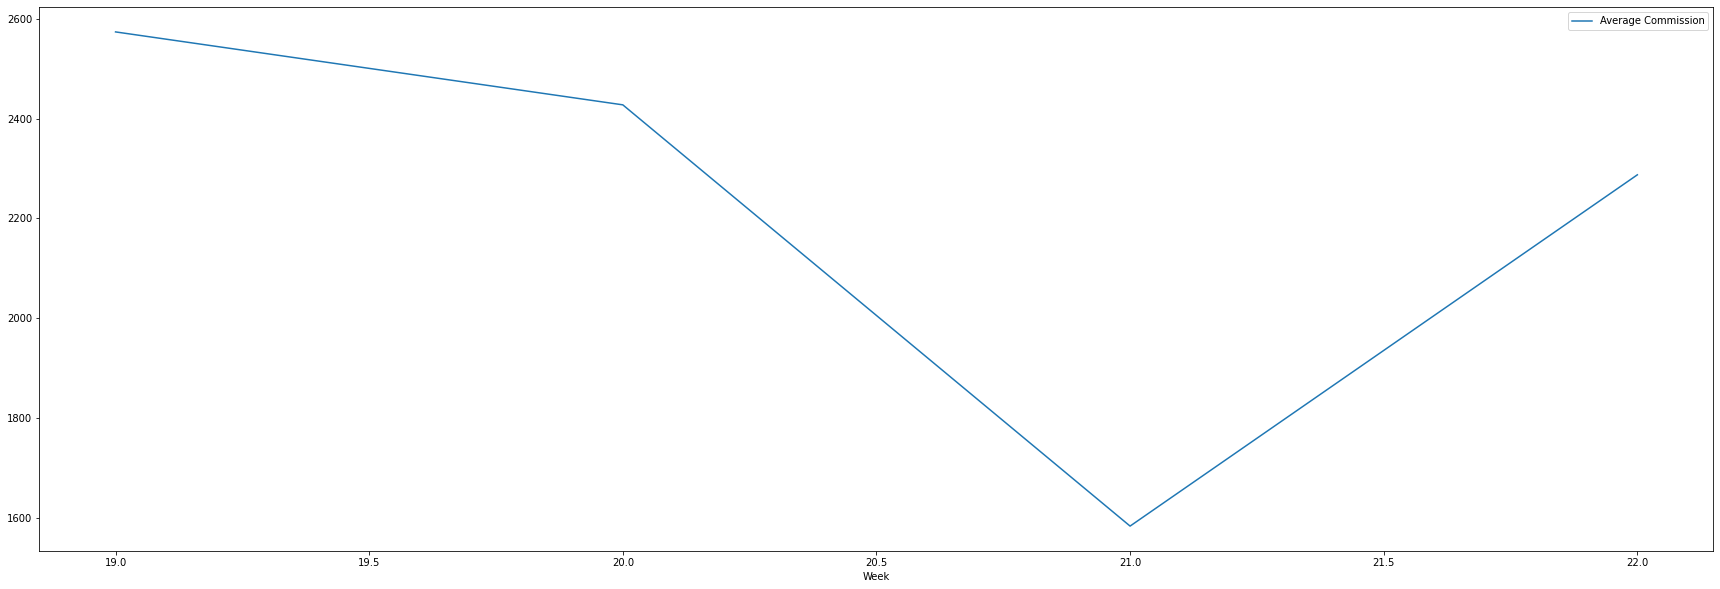

In [44]:
#getting the values for specific months
com_may = com_mth[com_mth['Month']==5]
com_may = com_may.sort_values(by='Week')
com_may = com_may.drop(columns=['Month'])
com_may

#getting the values for each week
wk1 = com_may[com_may['Week']=='1']
wk1

wk2 = com_may[com_may['Week']=='2']
wk2

wk3 = com_may[com_may['Week']=='3']
wk3 

wk4 = com_may[com_may['Week']=='4']
wk4

d = {'Week': [19, 20, 21, 22], 
     'Average Commission': [ wk1['Commision Earned'].mean(),
                             wk2['Commision Earned'].mean(),
                             wk3['Commision Earned'].mean(),
                             wk4['Commision Earned'].mean()]}

mayAvgComm = pd.DataFrame(data=d)
mayAvgComm
mayAvg_graph = mayAvgComm.plot.line(x='Week', y='Average Commission', figsize=(30,10))

In [45]:
com_may.min()
com_may.max()

Week                                     1
fscName                      Alex Macharia
serviceProviderName               Agrimech
serviceProvided              Mechanisation
type                             Ploughing
Acres/ Bags/Samples/Pumps              1.0
Commision Earned                     200.0
Value                               1500.0
Total                                  0.0
dtype: object

Week                                           4
fscName                            Willis Omondi
serviceProviderName                 jobella farm
serviceProvided                   Other Services
type                         Sugarcane Transport
Acres/ Bags/Samples/Pumps                  157.0
Commision Earned                          9000.0
Value                                   180000.0
Total                                       30.0
dtype: object

In [46]:
#Find the number of services provided in the month for each type
com_may.groupby('type')['fscName'].nunique()

type
Ploughing               9
Rotavation              5
Soil Testing            1
Spraying               16
Sugarcane Transport     1
Name: fscName, dtype: int64

In [47]:
ServPMay = com_may.groupby('fscName')['type'].nunique().reset_index()
ServPMay

,fscName,type
0,Alex Macharia,1
1,Amos Magero,1
2,Andrew Oywa,2
3,Benson Njuguna,2
4,Collins Rotich,1
5,David Onyunde,1
6,Elphas Owiti,1
7,Enock Okeyo,2
8,Everlene Ouma,1
9,Jane Kisia,2


In [48]:
demandMay = com_may.groupby('type')['fscName'].nunique().reset_index()
demandMay

,type,fscName
0,Ploughing,9
1,Rotavation,5
2,Soil Testing,1
3,Spraying,16
4,Sugarcane Transport,1


# JUNE <a class="anchor" id="jun"></a>

,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
689,1,Samson Opiyo,peter ruto,Mechanisation,Ploughing,15.00,1500.0,52500.0,7.500
690,1,Enock Okeyo,Nyabon Enterprises,Mechanisation,Ploughing,10.00,1000.0,30000.0,5.000
686,1,Samson Opiyo,Peter Ruto,Mechanisation,Ploughing,7.50,750.0,30000.0,3.750
691,1,Enock Okeyo,Nyabon Enterprises,Mechanisation,Rotavation,10.00,1000.0,30000.0,5.000
684,1,John Nyamburi,NIB,Mechanisation,Ploughing,7.00,700.0,21000.0,3.500
687,1,Samson Opiyo,Samson Opiyo,Other Services,Spraying,5.00,2500.0,2500.0,2.500
685,1,John Nyamburi,NIB,Mechanisation,Ploughing,12.00,1200.0,36000.0,6.000
692,1,Francis Opere,Francis Opere,Mechanisation,Ploughing,5.00,500.0,3500.0,2.500
688,1,Samson Opiyo,Samson Opiyo,Other Services,Spraying,6.00,3000.0,3000.0,3.000
693,1,Benard Ogako,Benard Ogako,Mechanisation,Ploughing,10.00,3000.0,30000.0,5.000


,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
689,1,Samson Opiyo,peter ruto,Mechanisation,Ploughing,15.0,1500.0,52500.0,7.50
690,1,Enock Okeyo,Nyabon Enterprises,Mechanisation,Ploughing,10.0,1000.0,30000.0,5.00
686,1,Samson Opiyo,Peter Ruto,Mechanisation,Ploughing,7.5,750.0,30000.0,3.75
691,1,Enock Okeyo,Nyabon Enterprises,Mechanisation,Rotavation,10.0,1000.0,30000.0,5.00
684,1,John Nyamburi,NIB,Mechanisation,Ploughing,7.0,700.0,21000.0,3.50
687,1,Samson Opiyo,Samson Opiyo,Other Services,Spraying,5.0,2500.0,2500.0,2.50
685,1,John Nyamburi,NIB,Mechanisation,Ploughing,12.0,1200.0,36000.0,6.00
692,1,Francis Opere,Francis Opere,Mechanisation,Ploughing,5.0,500.0,3500.0,2.50
688,1,Samson Opiyo,Samson Opiyo,Other Services,Spraying,6.0,3000.0,3000.0,3.00
693,1,Benard Ogako,Benard Ogako,Mechanisation,Ploughing,10.0,3000.0,30000.0,5.00


,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
695,2,Amos Magero,Bunyala TVET,Mechanisation,Ploughing,13.0,1300.0,36400.0,6.5
696,2,Amos Magero,Bunyala TVET,Mechanisation,Ploughing,13.0,1300.0,32500.0,6.5


,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
703,3,Sammy Sang,Sammy Sang,Other Services,Spraying,14.0,1400.0,4200.0,7.0
702,3,Samson Mburu,Golden Farm Soil Cares,Other Services,Soil Testing,90.0,9000.0,117000.0,45.0
706,3,John Nyamburi,NIB,Mechanisation,Rotavation,13.0,1300.0,39000.0,6.5
700,3,David Onyunde,SSP,Other Services,Spraying,3.0,150.0,2250.0,1.5
707,3,Willis Omondi,Nyabon Enterprises,Mechanisation,Ploughing,10.0,1000.0,30000.0,5.0
705,3,John Nyamburi,NIB,Mechanisation,Ploughing,13.0,1300.0,39000.0,6.5
709,3,Amos Magero,Bunyala TVET,Mechanisation,Planting,13.0,1300.0,32500.0,6.5
704,3,Mark Mwendia,Mark Mwendia,Mechanisation,Threshing,71.0,2130.0,7100.0,35.5
699,3,Peter Wambi,SSP,Other Services,Spraying,2.0,100.0,1500.0,1.0
708,3,Willis Omondi,Nyabon Enterprises,Mechanisation,Rotavation,10.0,1000.0,30000.0,5.0


,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
719,4,Mark Mwendia,Mark Mwendia,Mechanisation,Threshing,18.00,900.0,3600.0,9.000
715,4,Alex Macharia,Alex Macharia,Other Services,Spraying,73.00,7300.0,21900.0,36.500
718,4,Joseph Marangu,Joseph Marangu,Mechanisation,Threshing,26.00,650.0,2600.0,13.000
716,4,Noah Rono,Noah Rono,Other Services,Spraying,12.75,1200.0,3825.0,6.375
713,4,Robert Nyanjwa,kisuge transporters,Other Services,Sugarcane Transport,40.00,20000.0,240000.0,20.000
711,4,Geoffrey Kungu,Nyabon Enterprises,Mechanisation,Ploughing,50.00,5000.0,150000.0,25.000
721,4,Samuel Nyapola,SSP,Other Services,Spraying,1.00,50.0,750.0,1.000
714,4,Robert Nyanjwa,Ogola Ombok,Other Services,Sugarcane Transport,8.00,4000.0,48000.0,4.000
717,4,Noah Rono,Noah Rono,Other Services,Spraying,14.00,1400.0,4200.0,7.000
720,4,Eunice Akinyi,Andrew Abongo,Mechanisation,Ploughing,3.00,600.0,10500.0,1.000


,Week,Average Commission
0,23,1504.545455
1,24,1300.000000
2,25,2848.571429
3,26,3781.818182


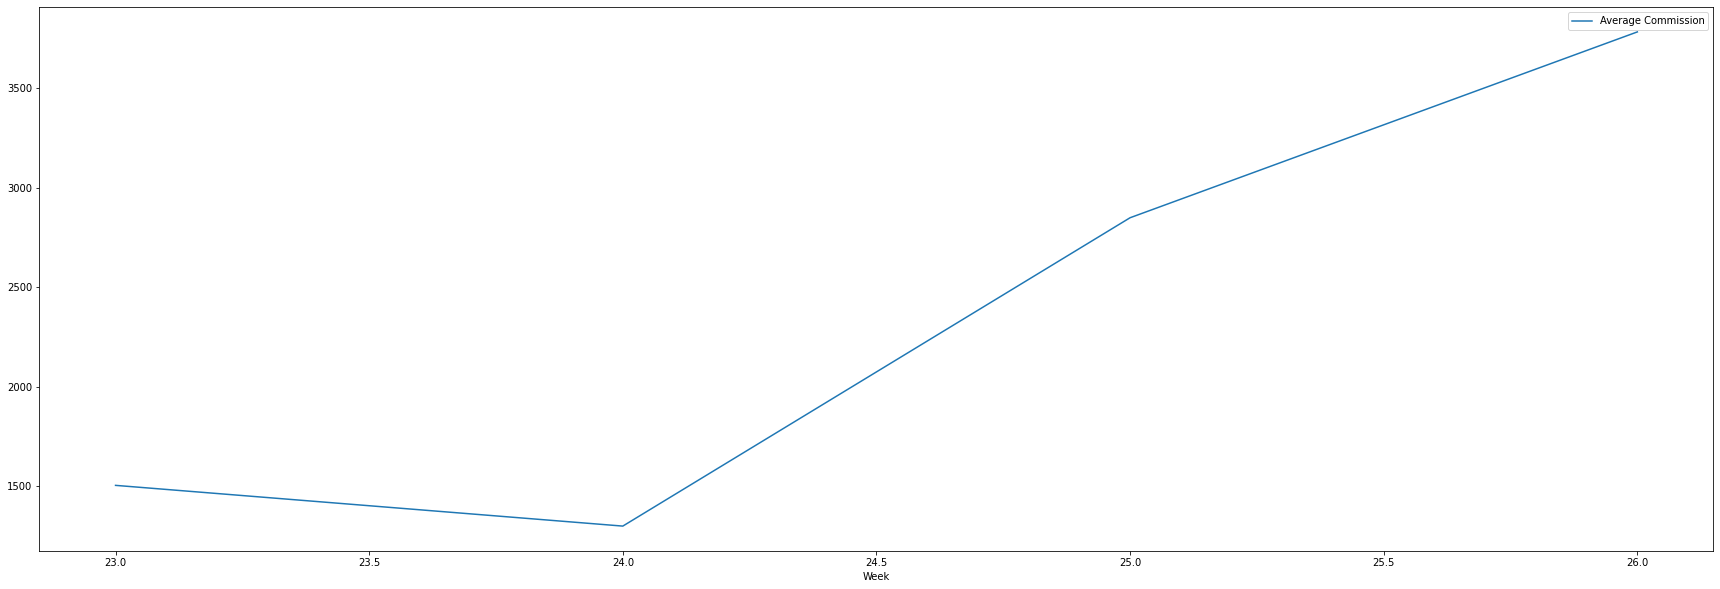

In [49]:
#getting the values for specific months
com_jun = com_mth[com_mth['Month']==6]
com_jun = com_jun.sort_values(by='Week')
com_jun = com_jun.drop(columns=['Month'])
com_jun

#getting the values for each week
wk1 = com_jun[com_jun['Week']=='1']
wk1

wk2 = com_jun[com_jun['Week']=='2']
wk2

wk3 = com_jun[com_jun['Week']=='3']
wk3 

wk4 = com_jun[com_jun['Week']=='4']
wk4


d = {'Week': [23, 24, 25, 26], 
     'Average Commission': [ wk1['Commision Earned'].mean(),
                             wk2['Commision Earned'].mean(),
                             wk3['Commision Earned'].mean(),
                             wk4['Commision Earned'].mean()]}

junAvgComm = pd.DataFrame(data=d)
junAvgComm
junAvg_graph = junAvgComm.plot.line(x='Week', y='Average Commission', figsize=(30,10))

In [50]:
com_jun.min()
com_jun.max()

Week                                     1
fscName                      Alex Macharia
serviceProviderName          Alex Macharia
serviceProvided              Mechanisation
type                              Planting
Acres/ Bags/Samples/Pumps              1.0
Commision Earned                      50.0
Value                                750.0
Total                                  1.0
dtype: object

Week                                      4
fscName                       Willis Omondi
serviceProviderName              peter ruto
serviceProvided              Other Services
type                              Threshing
Acres/ Bags/Samples/Pumps             110.0
Commision Earned                    20000.0
Value                              240000.0
Total                                  55.0
dtype: object

In [51]:
#Find the number of services provided in the month for each type
com_jun.groupby('type')['fscName'].nunique()

type
Planting                1
Ploughing              11
Rotavation              4
Soil Testing            2
Spraying                7
Sugarcane Transport     1
Threshing               2
Name: fscName, dtype: int64

In [52]:
ServPJun = com_may.groupby('fscName')['type'].nunique().reset_index()
ServPJun

,fscName,type
0,Alex Macharia,1
1,Amos Magero,1
2,Andrew Oywa,2
3,Benson Njuguna,2
4,Collins Rotich,1
5,David Onyunde,1
6,Elphas Owiti,1
7,Enock Okeyo,2
8,Everlene Ouma,1
9,Jane Kisia,2


In [53]:
demandJun = com_jun.groupby('type')['fscName'].nunique().reset_index()
demandJun

,type,fscName
0,Planting,1
1,Ploughing,11
2,Rotavation,4
3,Soil Testing,2
4,Spraying,7
5,Sugarcane Transport,1
6,Threshing,2


# SECOND QUARTER AVERAGE<a class="anchor" id="sqa"></a>

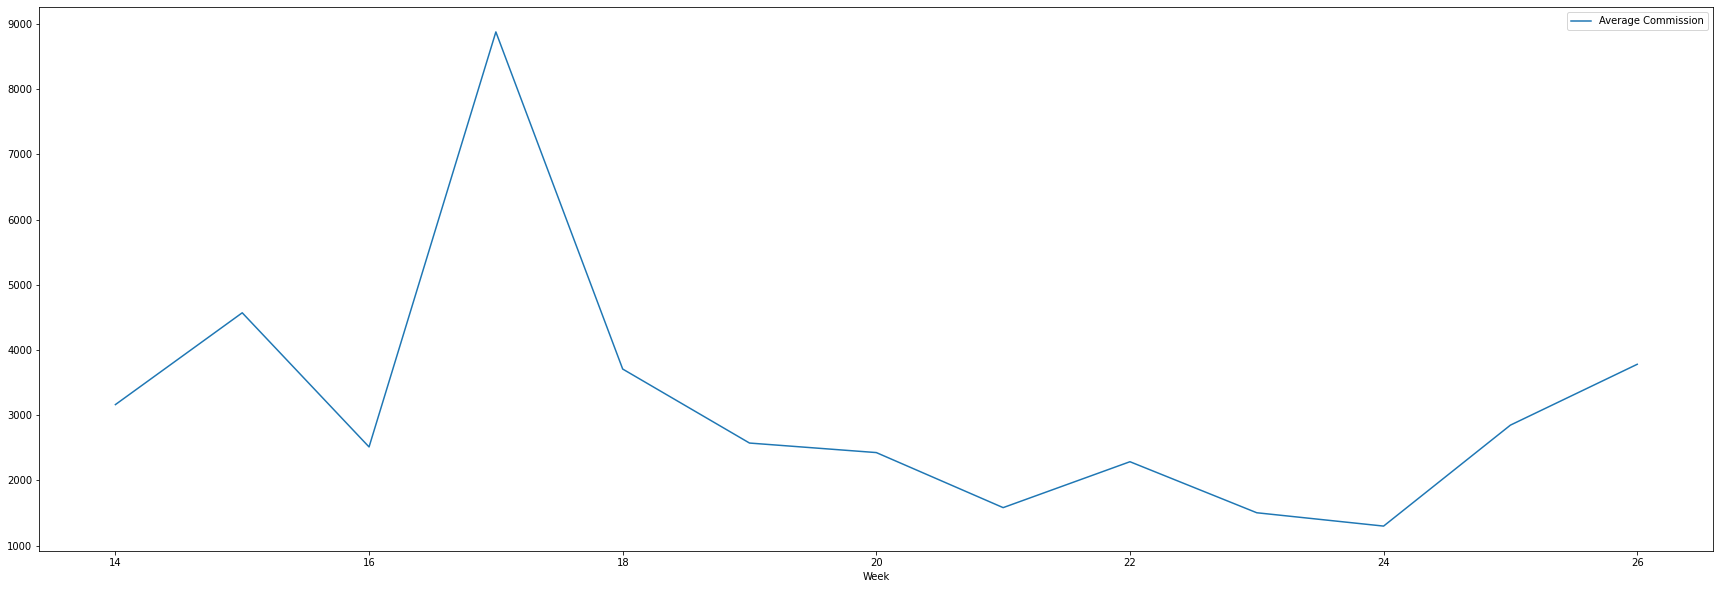

In [54]:
secondQuarter = [aprAvgComm, mayAvgComm, junAvgComm]

secondQ = pd.concat(secondQuarter)

secondQgraph = secondQ.plot.line(x='Week', y='Average Commission', figsize=(30,10))

In [55]:
#ServPJan
#ServPFeb
#ServPMar

#ServQ1 = pd.merge(ServPJan, ServPFeb, ServPMar, on=['fscName', 'type']).set_index(['fscName']).sum(axis=0)

providedQ2 = ServPApr.merge(ServPMay,on=['fscName']).merge(ServPJun,on=['fscName'])
#providedQ2
pd.merge(providedQ1, providedQ2, how="outer", on=["fscName"])
#pd.concat([providedQ1, providedQ2], join='inner')

,fscName,type_x_x,type_y_x,type_x,type_x_y,type_y_y,type_y
0,Alfred Mwanthi,1.0,1.0,2.0,NaN,NaN,NaN
1,Amos Magero,1.0,2.0,4.0,2.0,1.0,1.0
2,Andrew Oywa,1.0,1.0,1.0,NaN,NaN,NaN
3,Elder Mariamu Omurayi,1.0,1.0,4.0,NaN,NaN,NaN
4,Elphas Owiti,1.0,1.0,1.0,1.0,1.0,1.0
5,Emilly Akinyi,1.0,1.0,1.0,NaN,NaN,NaN
6,Florence Nabwire,1.0,1.0,2.0,NaN,NaN,NaN
7,Henderica Okwayo,1.0,2.0,1.0,NaN,NaN,NaN
8,Jacinta Adhaya Ochieng,1.0,1.0,1.0,NaN,NaN,NaN
9,Jane Kisia,1.0,1.0,1.0,NaN,NaN,NaN


# JULY <a class="anchor" id="jul"></a>

,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
735,1,Millicent Atieno,Dr. Habil,Mechanisation,Harrowing,9.0,900.0,22500.0,5.0
726,1,Alex Macharia,Alex Macharia,Other Services,Spraying,17.0,1700.0,5100.0,3.0
737,1,Samuel Nyapola,SSP,Other Services,Spraying,2.0,100.0,1500.0,2.0
723,1,Alex Macharia,Alex Macharia,Other Services,Spraying,10.0,1000.0,3000.0,4.0
733,1,MARTIN MAKOKHA,Fred Wanguka,Mechanisation,Ploughing,10.0,1000.0,30000.0,4.0
734,1,Millicent Atieno,Wendet,Mechanisation,Ploughing,10.0,1000.0,30000.0,11.0
728,1,Alex Macharia,Alex Macharia,Other Services,Spraying,20.0,2000.0,6000.0,8.0
725,1,Alex Macharia,Alex Macharia,Other Services,Spraying,20.0,2000.0,6000.0,6.0
731,1,Geoffrey Kungu,Nyabon Enterprises,Mechanisation,Rotavation,20.0,2000.0,60000.0,10.0
730,1,Geoffrey Kungu,Nyabon Enterprises,Mechanisation,Ploughing,20.0,2000.0,60000.0,10.0


,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
735,1,Millicent Atieno,Dr. Habil,Mechanisation,Harrowing,9.0,900.0,22500.0,5.0
726,1,Alex Macharia,Alex Macharia,Other Services,Spraying,17.0,1700.0,5100.0,3.0
737,1,Samuel Nyapola,SSP,Other Services,Spraying,2.0,100.0,1500.0,2.0
723,1,Alex Macharia,Alex Macharia,Other Services,Spraying,10.0,1000.0,3000.0,4.0
733,1,MARTIN MAKOKHA,Fred Wanguka,Mechanisation,Ploughing,10.0,1000.0,30000.0,4.0
734,1,Millicent Atieno,Wendet,Mechanisation,Ploughing,10.0,1000.0,30000.0,11.0
728,1,Alex Macharia,Alex Macharia,Other Services,Spraying,20.0,2000.0,6000.0,8.0
725,1,Alex Macharia,Alex Macharia,Other Services,Spraying,20.0,2000.0,6000.0,6.0
731,1,Geoffrey Kungu,Nyabon Enterprises,Mechanisation,Rotavation,20.0,2000.0,60000.0,10.0
730,1,Geoffrey Kungu,Nyabon Enterprises,Mechanisation,Ploughing,20.0,2000.0,60000.0,10.0


,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
751,2,Marlone Awillie,Self,Other Services,Spraying,15.0,7500.0,7500.0,2.0
740,2,Francis Opere,Miyare ATC,Other Services,Spraying,1.0,100.0,2800.0,1.0
738,2,James Onyango,Ugenya TVET,Mechanisation,Ploughing,7.0,700.0,21000.0,3.0
745,2,Robert Opar,jobella farm,Mechanisation,Harrowing,6.0,1200.0,19200.0,2.0
744,2,Robert Opar,jobella farm,Mechanisation,Ploughing,8.0,1600.0,28000.0,4.0
743,2,Robert Nyanjwa,jobella farm,Mechanisation,Ploughing,15.0,3000.0,55500.0,3.0
748,2,Robert Nyanjwa,jobella farm,Other Services,Sugarcane Transport,70.0,42000.0,420000.0,41.0
739,2,Judith Ochuodho,Masir,Mechanisation,Ploughing,4.0,400.0,12000.0,2.0
746,2,Francis Opere,jobella farm,Other Services,Sugarcane Transport,112.0,22400.0,392000.0,37.0
742,2,Robert Nyanjwa,jobella farm,Other Services,Sugarcane Transport,56.0,36600.0,336000.0,5.0


,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total


,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
752,4,Geoffrey Kungu,geofrey,Other Services,Spraying,10.0,5000.0,5000.0,2.0
754,4,Kephers Ogola,Kephers Ogola,Other Services,Spraying,14.0,5600.0,7000.0,2.0
753,4,Peter Tanyasis,Peter Tanyasis,Other Services,Spraying,22.0,6600.0,6600.0,2.0


,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
756,5,John Koileken,JOHN KOILEKEN,Other Services,Spraying,30.0,12000.0,12000.0,2.0
755,5,Peter Tanyasis,Peter Tanyasis,Other Services,Spraying,36.0,10800.0,10800.0,2.0
757,5,Alex Macharia,Alex Macharia,Other Services,Spraying,25.0,2500.0,7500.0,2.0


,Week,Average Commission
0,27,2625.625000
1,28,10607.142857
2,29,0.000000
3,30,5733.333333
4,31,8433.333333


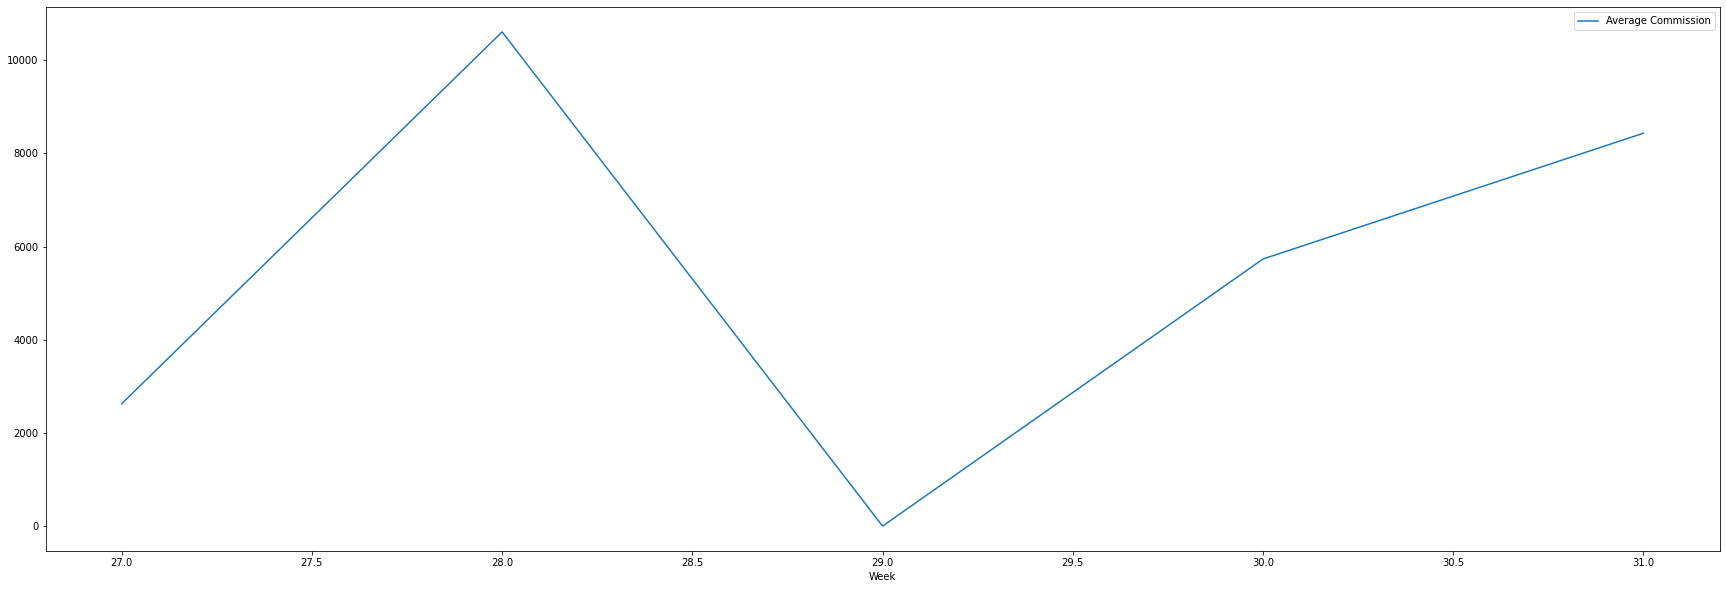

In [56]:
#getting the values for specific months
com_jul = com_mth[com_mth['Month']==7]
com_jul = com_jul.sort_values(by='Week')
com_jul = com_jul.drop(columns=['Month'])
com_jul

#getting the values for each week
wk1 = com_jul[com_jul['Week']=='1']
wk1

wk2 = com_jul[com_jul['Week']=='2']
wk2

wk3 = com_jul[com_jul['Week']=='3']
wk3 

wk4 = com_jul[com_jul['Week']=='4']
wk4

wk5 = com_jul[com_jul['Week']=='5']
wk5

d = {'Week': [27, 28, 29, 30, 31], 
     'Average Commission': [ wk1['Commision Earned'].mean(),
                             wk2['Commision Earned'].mean(),
                             wk3['Commision Earned'].mean(),
                             wk4['Commision Earned'].mean(),
                             wk5['Commision Earned'].mean()]}

julAvgComm = pd.DataFrame(data=d)

julAvgComm['Average Commission'] = julAvgComm['Average Commission'].fillna(0)
julAvgComm
julAvg_graph = julAvgComm.plot.line(x='Week', y='Average Commission', figsize=(30,10))

In [57]:
com_jul.min()
com_jul.max()

Week                                     1
fscName                      Alex Macharia
serviceProviderName          Alex Macharia
serviceProvided              Mechanisation
type                             Harrowing
Acres/ Bags/Samples/Pumps              1.0
Commision Earned                     100.0
Value                                900.0
Total                                  1.0
dtype: object

Week                                           5
fscName                             Wycliffe Bet
serviceProviderName                 jobella farm
serviceProvided                   Other Services
type                         Sugarcane Transport
Acres/ Bags/Samples/Pumps                  154.0
Commision Earned                         42000.0
Value                                   539000.0
Total                                       51.0
dtype: object

In [58]:
#Find the number of services provided in the month for each type
com_jul.groupby('type')['fscName'].nunique()

type
Harrowing               2
Ploughing              10
Rotavation              1
Spraying               10
Sugarcane Transport     2
Name: fscName, dtype: int64

# AUGUST  <a class="anchor" id="aug"></a>

,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
761,1,Kephers Ogola,Kephers Ogola,Other Services,Spraying,13.0,6500.0,6500.0,2.0
759,1,Alex Macharia,Alex Macharia,Other Services,Spraying,36.0,5400.0,10800.0,2.0
762,1,Elder Mariamu Omurayi,Marlone Awillie,Other Services,Spraying,10.0,500.0,4000.0,2.0
760,1,Samuel Nyapola,SSP,Other Services,Spraying,8.0,400.0,5200.0,2.0
758,1,Leanah Mwangi,Leanah Mwangi,Other Services,Spraying,20.0,2000.0,6000.0,2.0
763,1,Phylis Olendo,SSP,Other Services,Spraying,7.0,0.0,3500.0,2.0
764,1,Amos Magero,Marlone Awillie,Other Services,Spraying,8.0,0.0,3200.0,2.0
766,3,David Onyunde,SSP,Other Services,Spraying,13.0,650.0,8450.0,2.0
765,3,Samuel Nyapola,SSP,Other Services,Spraying,10.0,500.0,6500.0,2.0
767,3,James Onyango,SSP,Other Services,Spraying,8.0,400.0,5200.0,2.0


,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
761,1,Kephers Ogola,Kephers Ogola,Other Services,Spraying,13.0,6500.0,6500.0,2.0
759,1,Alex Macharia,Alex Macharia,Other Services,Spraying,36.0,5400.0,10800.0,2.0
762,1,Elder Mariamu Omurayi,Marlone Awillie,Other Services,Spraying,10.0,500.0,4000.0,2.0
760,1,Samuel Nyapola,SSP,Other Services,Spraying,8.0,400.0,5200.0,2.0
758,1,Leanah Mwangi,Leanah Mwangi,Other Services,Spraying,20.0,2000.0,6000.0,2.0
763,1,Phylis Olendo,SSP,Other Services,Spraying,7.0,0.0,3500.0,2.0
764,1,Amos Magero,Marlone Awillie,Other Services,Spraying,8.0,0.0,3200.0,2.0


,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total


,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
766,3,David Onyunde,SSP,Other Services,Spraying,13.0,650.0,8450.0,2.0
765,3,Samuel Nyapola,SSP,Other Services,Spraying,10.0,500.0,6500.0,2.0
767,3,James Onyango,SSP,Other Services,Spraying,8.0,400.0,5200.0,2.0
770,3,Leanah Mwangi,Leanah Mwangi,Other Services,Spraying,35.0,3500.0,10500.0,2.0
768,3,Sylvester Owino,SSP,Other Services,Spraying,7.0,350.0,4550.0,2.0
771,3,Joseph Nyalando,Joseph Nyalando,Other Services,Spraying,8.0,3200.0,3200.0,2.0
769,3,Samson Opiyo,Samson Opiyo,Other Services,Spraying,8.0,1200.0,4000.0,2.0


,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
773,4,Samuel Nyapola,SSP,Other Services,Spraying,12.0,600.0,7800.0,2.0
772,4,Sylvester Owino,SSP,Other Services,Spraying,9.0,450.0,5850.0,2.0


,Week,Average Commission
0,32,2114.285714
1,33,0.000000
2,34,1400.000000
3,35,525.000000


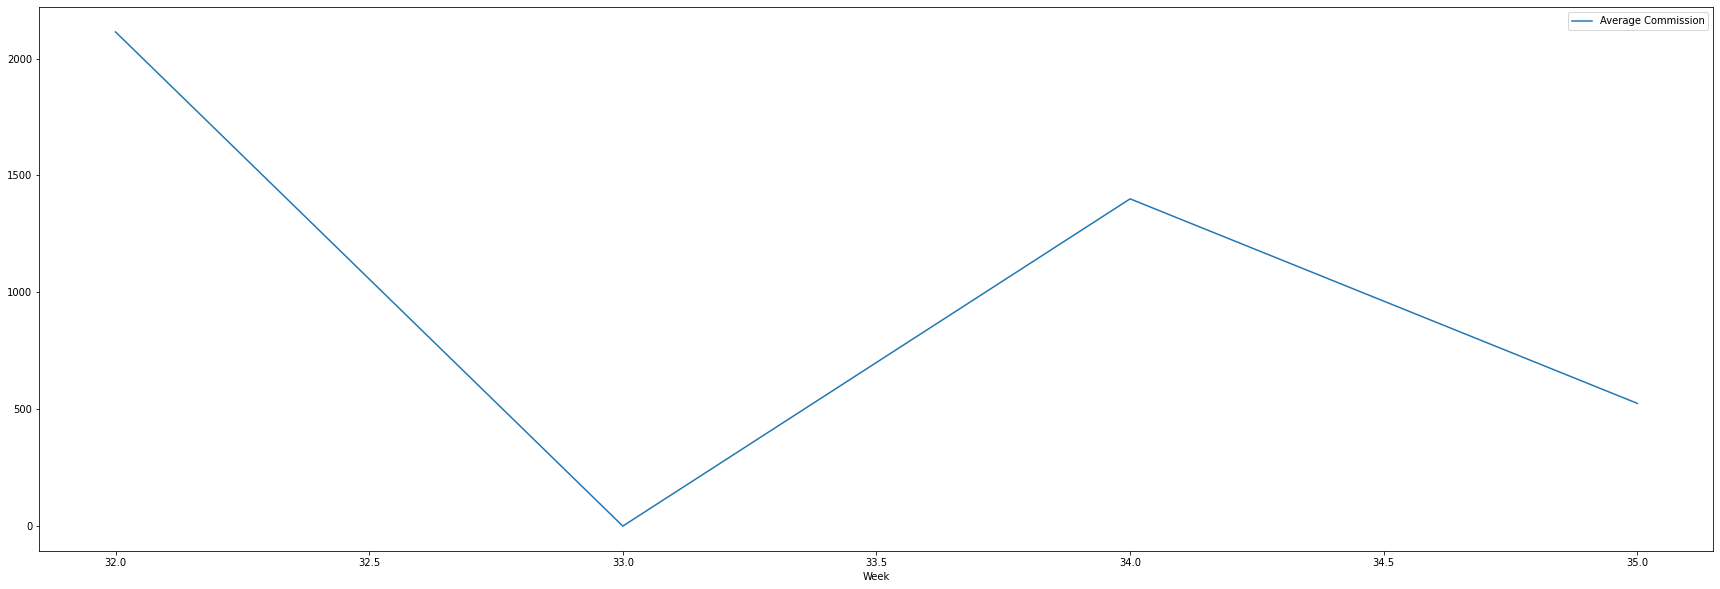

In [59]:
#getting the values for specific months
com_aug = com_mth[com_mth['Month']==8]
com_aug = com_aug.sort_values(by='Week')
com_aug = com_aug.drop(columns=['Month'])
com_aug

#getting the values for each week
wk1 = com_aug[com_aug['Week']=='1']
wk1

wk2 = com_aug[com_aug['Week']=='2']
wk2

wk3 = com_aug[com_aug['Week']=='3']
wk3 

wk4 = com_aug[com_aug['Week']=='4']
wk4


d = {'Week': [32, 33, 34, 35], 
     'Average Commission': [ wk1['Commision Earned'].mean(),
                             wk2['Commision Earned'].mean(),
                             wk3['Commision Earned'].mean(),
                             wk4['Commision Earned'].mean()]}

augAvgComm = pd.DataFrame(data=d)
augAvgComm['Average Commission'] = augAvgComm['Average Commission'].fillna(0)
augAvgComm
augAvg_graph = augAvgComm.plot.line(x='Week', y='Average Commission', figsize=(30,10))

In [60]:
com_aug.min()
com_aug.max()

Week                                      1
fscName                       Alex Macharia
serviceProviderName           Alex Macharia
serviceProvided              Other Services
type                               Spraying
Acres/ Bags/Samples/Pumps               7.0
Commision Earned                        0.0
Value                                3200.0
Total                                   2.0
dtype: object

Week                                       4
fscName                      Sylvester Owino
serviceProviderName             Samson Opiyo
serviceProvided               Other Services
type                                Spraying
Acres/ Bags/Samples/Pumps               36.0
Commision Earned                      6500.0
Value                                10800.0
Total                                    2.0
dtype: object

In [61]:
#Find the number of services provided in the month for each type
com_aug.groupby('type')['fscName'].nunique()

type
Spraying    12
Name: fscName, dtype: int64

# SEPTEMBER <a class="anchor" id="sep"></a>

,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
777,1,Sylvester Owino,SSP,Other Services,Spraying,9.0,900.0,5850.0,2.0
775,1,David Onyunde,SSP,Other Services,Spraying,29.0,1450.0,18850.0,2.0
780,1,Marlone Awillie,Self,Other Services,Spraying,28.0,14000.0,14000.0,2.0
778,1,Martin Oloo Juma,SSP,Other Services,Spraying,13.0,1300.0,8450.0,2.0
781,1,Elder Mariamu Omurayi,Marlone Awillie,Other Services,Spraying,14.0,700.0,7000.0,2.0
779,1,Noah Owuor,SSP,Other Services,Spraying,11.0,1100.0,7700.0,2.0
776,1,Samuel Nyapola,SSP,Other Services,Spraying,18.0,900.0,11700.0,2.0
774,1,Caleb Odhiambo,Calleb Odhiambo,Other Services,Spraying,20.0,4000.0,6000.0,2.0
787,2,Matilda Owira,SSP,Other Services,Spraying,11.0,880.0,7150.0,2.0
782,2,Nobert Ogutu,Norbert Ogutu,Other Services,Spraying,148.0,74000.0,74000.0,2.0


,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
777,1,Sylvester Owino,SSP,Other Services,Spraying,9.0,900.0,5850.0,2.0
775,1,David Onyunde,SSP,Other Services,Spraying,29.0,1450.0,18850.0,2.0
780,1,Marlone Awillie,Self,Other Services,Spraying,28.0,14000.0,14000.0,2.0
778,1,Martin Oloo Juma,SSP,Other Services,Spraying,13.0,1300.0,8450.0,2.0
781,1,Elder Mariamu Omurayi,Marlone Awillie,Other Services,Spraying,14.0,700.0,7000.0,2.0
779,1,Noah Owuor,SSP,Other Services,Spraying,11.0,1100.0,7700.0,2.0
776,1,Samuel Nyapola,SSP,Other Services,Spraying,18.0,900.0,11700.0,2.0
774,1,Caleb Odhiambo,Calleb Odhiambo,Other Services,Spraying,20.0,4000.0,6000.0,2.0


,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
787,2,Matilda Owira,SSP,Other Services,Spraying,11.0,880.0,7150.0,2.0
782,2,Nobert Ogutu,Norbert Ogutu,Other Services,Spraying,148.0,74000.0,74000.0,2.0
786,2,James Onyango,SSP,Other Services,Spraying,13.0,1040.0,7800.0,2.0
785,2,Sylvester Owino,SSP,Other Services,Spraying,16.0,1600.0,10400.0,2.0
784,2,Samuel Nyapola,SSP,Other Services,Spraying,26.0,2600.0,16900.0,2.0
783,2,David Onyunde,SSP,Other Services,Spraying,32.0,3200.0,20800.0,2.0


,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
797,3,Sylvester Owino,SSP,Other Services,Spraying,11.0,1550.0,7150.0,2.0
796,3,David Onyunde,SSP,Other Services,Spraying,34.5,1725.0,22425.0,2.0
788,3,Alex Macharia,Alex Macharia,Other Services,Spraying,20.0,2000.0,6000.0,2.0
795,3,Samuel Nyapola,Dr. Habil,Other Services,Spraying,22.5,1125.0,16875.0,2.0
794,3,Emilly Akinyi,Dr. Habil,Other Services,Spraying,20.0,1000.0,15000.0,2.0
798,3,Amos Magero,SSP,Other Services,Spraying,10.0,500.0,5000.0,2.0
793,3,Peter Wambi,SSP,Other Services,Spraying,16.0,800.0,10400.0,2.0
792,3,Matilda Owira,SSP,Other Services,Spraying,12.0,600.0,7800.0,2.0
791,3,Nobert Ogutu,Norbert Ogutu,Other Services,Spraying,10.0,5000.0,5000.0,2.0
790,3,Nobert Ogutu,Norbert Ogutu,Other Services,Spraying,20.0,5000.0,5000.0,2.0


,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
806,4,James Onyango,SSP,Other Services,Spraying,9.0,450.0,5850.0,2.0
804,4,David Onyunde,SSP,Other Services,Spraying,21.0,1050.0,13650.0,2.0
808,4,Samuel Nyapola,dr. Habil,Other Services,Spraying,16.0,800.0,12000.0,2.0
802,4,Joseph Odwar,Joseph Odwaro,Other Services,Spraying,15.0,7500.0,7500.0,2.0
799,4,Alex Macharia,Alex Macharia,Other Services,Spraying,15.0,1500.0,4500.0,2.0
803,4,Paul Ochieng Omollo,Paul Ochieng,Other Services,Spraying,10.0,4000.0,4000.0,2.0
805,4,Matilda Owira,SSP,Other Services,Spraying,11.0,550.0,7150.0,2.0
800,4,Joseph Nyalando,Joseph Nyalando,Other Services,Spraying,25.0,5000.0,5000.0,2.0
807,4,Peter Wambi,SSP,Other Services,Spraying,7.0,350.0,4550.0,2.0
801,4,Dominic Okungu,Domnic Okungu,Other Services,Spraying,7.0,3500.0,3500.0,2.0


,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
815,5,Alex Macharia,Alex Macharia,Other Services,Spraying,26.0,2600.0,7800.0,2.0
813,5,Sylvester Owino,SSP,Other Services,Spraying,6.5,325.0,3250.0,2.0
812,5,David Onyunde,SSP,Other Services,Spraying,25.0,1250.0,16250.0,2.0
809,5,Nobert Ogutu,Meshack,Other Services,Spraying,81.0,11100.0,55500.0,2.0
810,5,Samuel Nyapola,dr. Habil,Other Services,Spraying,18.0,900.0,13500.0,2.0
811,5,Peter Wambi,SSP,Other Services,Spraying,9.0,450.0,5850.0,2.0
814,5,Emilly Akinyi,SSP,Other Services,Spraying,11.0,550.0,5500.0,2.0


,Week,Average Commission
0,36,3043.750000
1,37,13886.666667
2,38,2245.454545
3,39,2470.000000
4,40,2453.571429


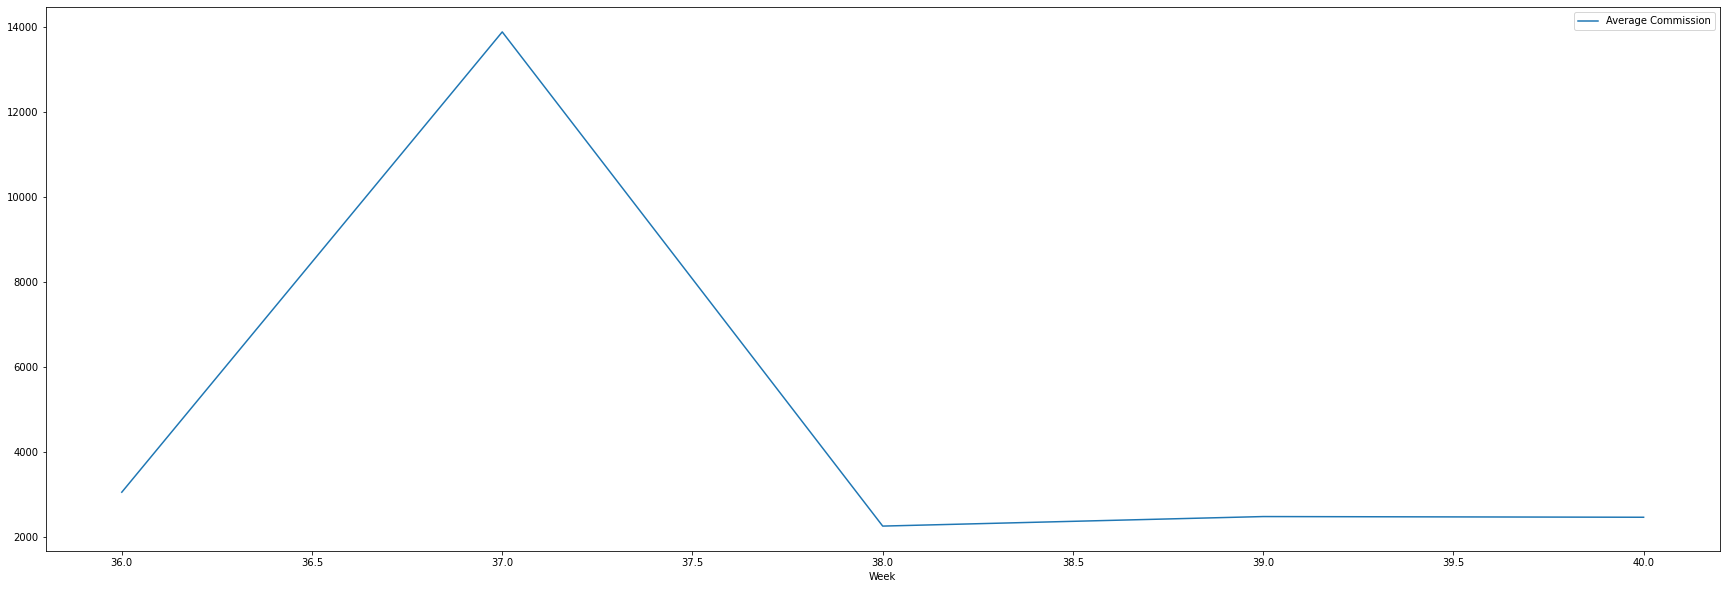

In [62]:
#getting the values for specific months
com_sep = com_mth[com_mth['Month']==9]
com_sep = com_sep.sort_values(by='Week')
com_sep = com_sep.drop(columns=['Month'])
com_sep

#getting the values for each week
wk1 = com_sep[com_sep['Week']=='1']
wk1

wk2 = com_sep[com_sep['Week']=='2']
wk2

wk3 = com_sep[com_sep['Week']=='3']
wk3 

wk4 = com_sep[com_sep['Week']=='4']
wk4

wk5 = com_sep[com_sep['Week']=='5']
wk5

d = {'Week': [36, 37, 38, 39, 40], 
     'Average Commission': [ wk1['Commision Earned'].mean(),
                             wk2['Commision Earned'].mean(),
                             wk3['Commision Earned'].mean(),
                             wk4['Commision Earned'].mean(),
                             wk5['Commision Earned'].mean()]}

sepAvgComm = pd.DataFrame(data=d)
sepAvgComm
sepAvg_graph = sepAvgComm.plot.line(x='Week', y='Average Commission', figsize=(30,10))

In [63]:
com_sep.min()
com_sep.max()

Week                                      1
fscName                       Alex Macharia
serviceProviderName           Alex Macharia
serviceProvided              Other Services
type                               Spraying
Acres/ Bags/Samples/Pumps               6.5
Commision Earned                      325.0
Value                                3250.0
Total                                   2.0
dtype: object

Week                                       5
fscName                      Sylvester Owino
serviceProviderName                dr. Habil
serviceProvided               Other Services
type                                Spraying
Acres/ Bags/Samples/Pumps              148.0
Commision Earned                     74000.0
Value                                74000.0
Total                                    2.0
dtype: object

In [64]:
#Find the number of services provided in the month for each type
com_sep.groupby('type')['fscName'].nunique()

type
Spraying    20
Name: fscName, dtype: int64

# THIRD QUARTER AVERAGE<a class="anchor" id="tqa"></a>

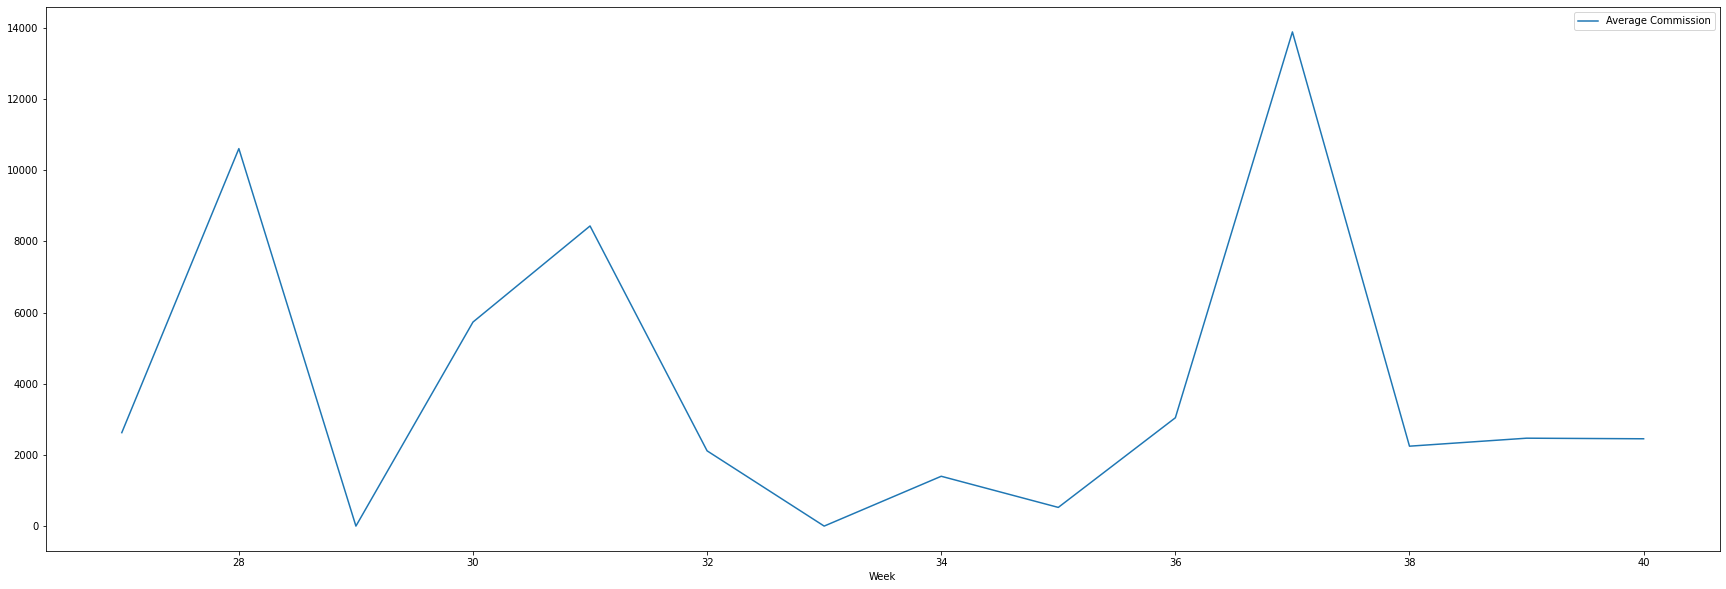

In [65]:
thirdQuarter = [julAvgComm, augAvgComm, sepAvgComm]

thirdQ = pd.concat(thirdQuarter)

thirdQgraph = thirdQ.plot.line(x='Week', y='Average Commission', figsize=(30,10))

# OCTOBER <a class="anchor" id="oct"></a>

,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
821,1,Nobert Ogutu,Norbert Ogutu,Other Services,Spraying,17.0,8500.0,8500.0,2.0
822,1,Nobert Ogutu,Norbert Ogutu,Other Services,Spraying,41.0,20500.0,20500.0,2.0
820,1,Joseph Odwar,Joseph Odwaro,Other Services,Spraying,56.0,28000.0,28000.0,2.0
816,1,Paul Kuria,Paul Kuria,Other Services,Spraying,12.0,1200.0,3600.0,2.0
818,1,Douglas Kipletan,martha,Other Services,Spraying,79.0,3950.0,3950.0,2.0
817,1,Noah Rono,Noah Rono,Other Services,Spraying,11.0,330.0,3300.0,2.0
819,1,Robert Opar,Robert Opar,Other Services,Spraying,2.0,500.0,3700.0,2.0
823,2,Douglas Kipletan,rebbeca,Other Services,Spraying,89.0,4160.0,4160.0,2.0
824,2,Paul Kuria,Paul Kuria,Other Services,Spraying,32.0,3200.0,96000.0,2.0
825,2,Nobert Ogutu,Norbert Ogutu,Other Services,Spraying,50.0,25000.0,25000.0,2.0


,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
821,1,Nobert Ogutu,Norbert Ogutu,Other Services,Spraying,17.0,8500.0,8500.0,2.0
822,1,Nobert Ogutu,Norbert Ogutu,Other Services,Spraying,41.0,20500.0,20500.0,2.0
820,1,Joseph Odwar,Joseph Odwaro,Other Services,Spraying,56.0,28000.0,28000.0,2.0
816,1,Paul Kuria,Paul Kuria,Other Services,Spraying,12.0,1200.0,3600.0,2.0
818,1,Douglas Kipletan,martha,Other Services,Spraying,79.0,3950.0,3950.0,2.0
817,1,Noah Rono,Noah Rono,Other Services,Spraying,11.0,330.0,3300.0,2.0
819,1,Robert Opar,Robert Opar,Other Services,Spraying,2.0,500.0,3700.0,2.0


,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
823,2,Douglas Kipletan,rebbeca,Other Services,Spraying,89.0,4160.0,4160.0,2.0
824,2,Paul Kuria,Paul Kuria,Other Services,Spraying,32.0,3200.0,96000.0,2.0
825,2,Nobert Ogutu,Norbert Ogutu,Other Services,Spraying,50.0,25000.0,25000.0,2.0


,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
829,3,David Onyunde,SSP,Other Services,Spraying,22.0,1100.0,14300.0,2.0
827,3,Noah Rono,Noah Rono,Other Services,Spraying,28.0,2000.0,8400.0,2.0
833,3,Marlone Awillie,Self,Other Services,Spraying,41.0,20500.0,20500.0,2.0
830,3,Sylvester Owino,SSP,Other Services,Spraying,7.0,350.0,4550.0,2.0
832,3,Samuel Nyapola,dr. Habil,Other Services,Spraying,14.0,700.0,9100.0,2.0
831,3,Lucas Onyango,SSP,Other Services,Spraying,5.0,250.0,3250.0,2.0
826,3,Alex Macharia,Alex Macharia,Other Services,Spraying,29.0,2900.0,8700.0,2.0
828,3,Paul Kuria,Paul Kuria,Other Services,Spraying,26.0,2600.0,7800.0,2.0


,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
836,4,Joan Cheserem,Collins Koech,Other Services,Spraying,84.0,4200.0,4200.0,2.0
839,4,Martin Oloo Juma,SSP,Other Services,Spraying,10.0,500.0,6500.0,2.0
838,4,Samson Opiyo,Samson Opiyo,Other Services,Spraying,10.0,3000.0,5000.0,2.0
841,4,Samuel Nyapola,SSP,Other Services,Spraying,12.0,600.0,7800.0,2.0
835,4,Joan Cheserem,titus chemweno,Other Services,Spraying,71.0,3550.0,3550.0,2.0
834,4,Joan Cheserem,justine serem,Other Services,Spraying,81.0,4050.0,4050.0,2.0
837,4,Hans Khando,hans khado,Other Services,Spraying,327.0,6540.0,6540.0,2.0
840,4,Noah Owuor,SSP,Other Services,Spraying,6.0,300.0,3900.0,2.0


,Week,Average Commission
0,41,8997.142857
1,42,10786.666667
2,43,3800.000000
3,44,2842.500000


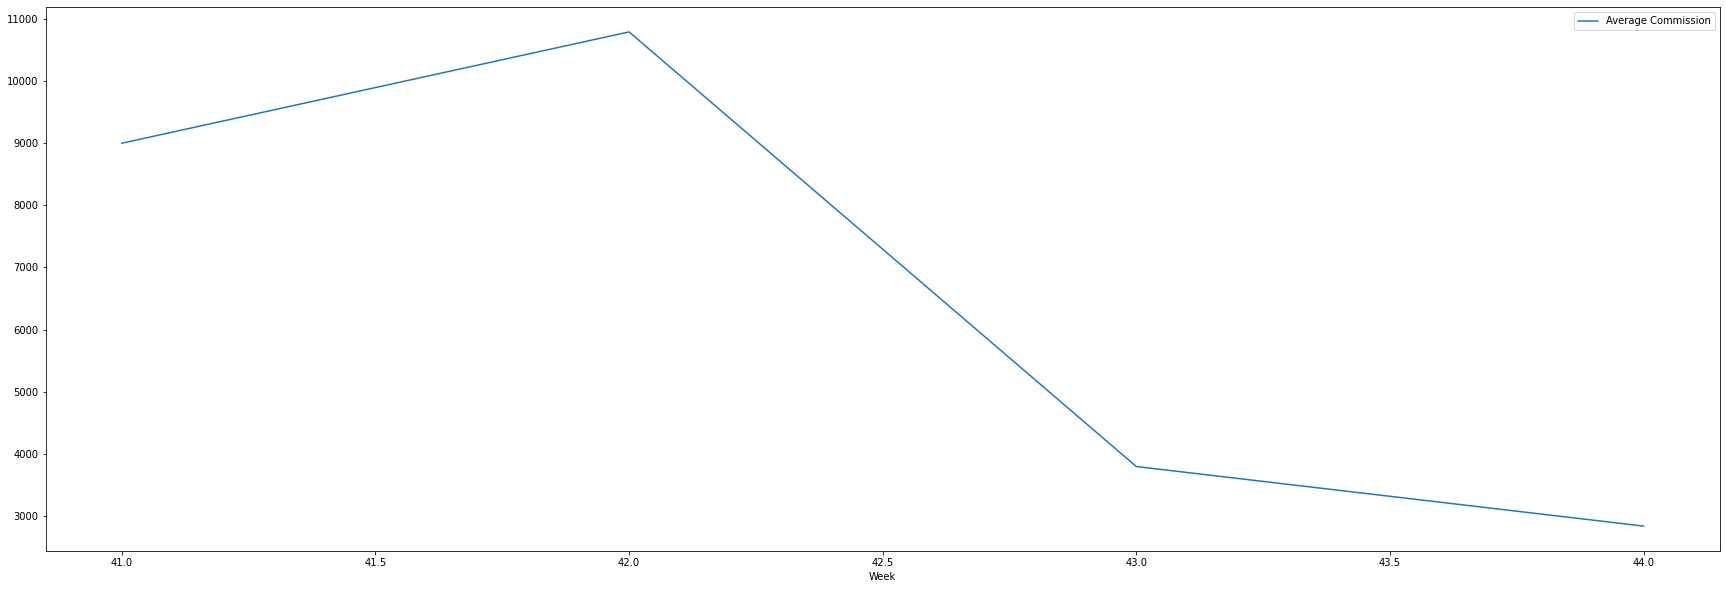

In [66]:
#getting the values for specific months
com_oct = com_mth[com_mth['Month']==10]
com_oct = com_oct.sort_values(by='Week')
com_oct = com_oct.drop(columns=['Month'])
com_oct

#getting the values for each week
wk1 = com_oct[com_oct['Week']=='1']
wk1

wk2 = com_oct[com_oct['Week']=='2']
wk2

wk3 = com_oct[com_oct['Week']=='3']
wk3 

wk4 = com_oct[com_oct['Week']=='4']
wk4


d = {'Week': [41, 42, 43, 44], 
     'Average Commission': [ wk1['Commision Earned'].mean(),
                             wk2['Commision Earned'].mean(),
                             wk3['Commision Earned'].mean(),
                             wk4['Commision Earned'].mean()]}

octAvgComm = pd.DataFrame(data=d)
octAvgComm
octAvg_graph = octAvgComm.plot.line(x='Week', y='Average Commission', figsize=(30,10))

In [67]:
com_oct.min()
com_oct.max()

Week                                      1
fscName                       Alex Macharia
serviceProviderName           Alex Macharia
serviceProvided              Other Services
type                               Spraying
Acres/ Bags/Samples/Pumps               2.0
Commision Earned                      250.0
Value                                3250.0
Total                                   2.0
dtype: object

Week                                       4
fscName                      Sylvester Owino
serviceProviderName           titus chemweno
serviceProvided               Other Services
type                                Spraying
Acres/ Bags/Samples/Pumps              327.0
Commision Earned                     28000.0
Value                                96000.0
Total                                    2.0
dtype: object

In [68]:
#Find the number of services provided in the month for each type
com_oct.groupby('type')['fscName'].nunique()

type
Spraying    17
Name: fscName, dtype: int64

# NOVEMBER <a class="anchor" id="nov"></a>

,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
844,1,Samuel Nyapola,SSP,Other Services,Spraying,12.0,600.0,7800.0,2.0
845,1,Martin Oloo Juma,SSP,Other Services,Spraying,9.0,450.0,5850.0,2.0
842,1,Noah Rono,Naoh Rono,Other Services,Spraying,29.0,2900.0,8700.0,2.0
843,1,David Onyunde,SSP,Other Services,Spraying,24.0,1200.0,15600.0,2.0


,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Commision Earned,Value,Total
844,1,Samuel Nyapola,SSP,Other Services,Spraying,12.0,600.0,7800.0,2.0
845,1,Martin Oloo Juma,SSP,Other Services,Spraying,9.0,450.0,5850.0,2.0
842,1,Noah Rono,Naoh Rono,Other Services,Spraying,29.0,2900.0,8700.0,2.0
843,1,David Onyunde,SSP,Other Services,Spraying,24.0,1200.0,15600.0,2.0


,Week,Average Commission
0,45,1287.5


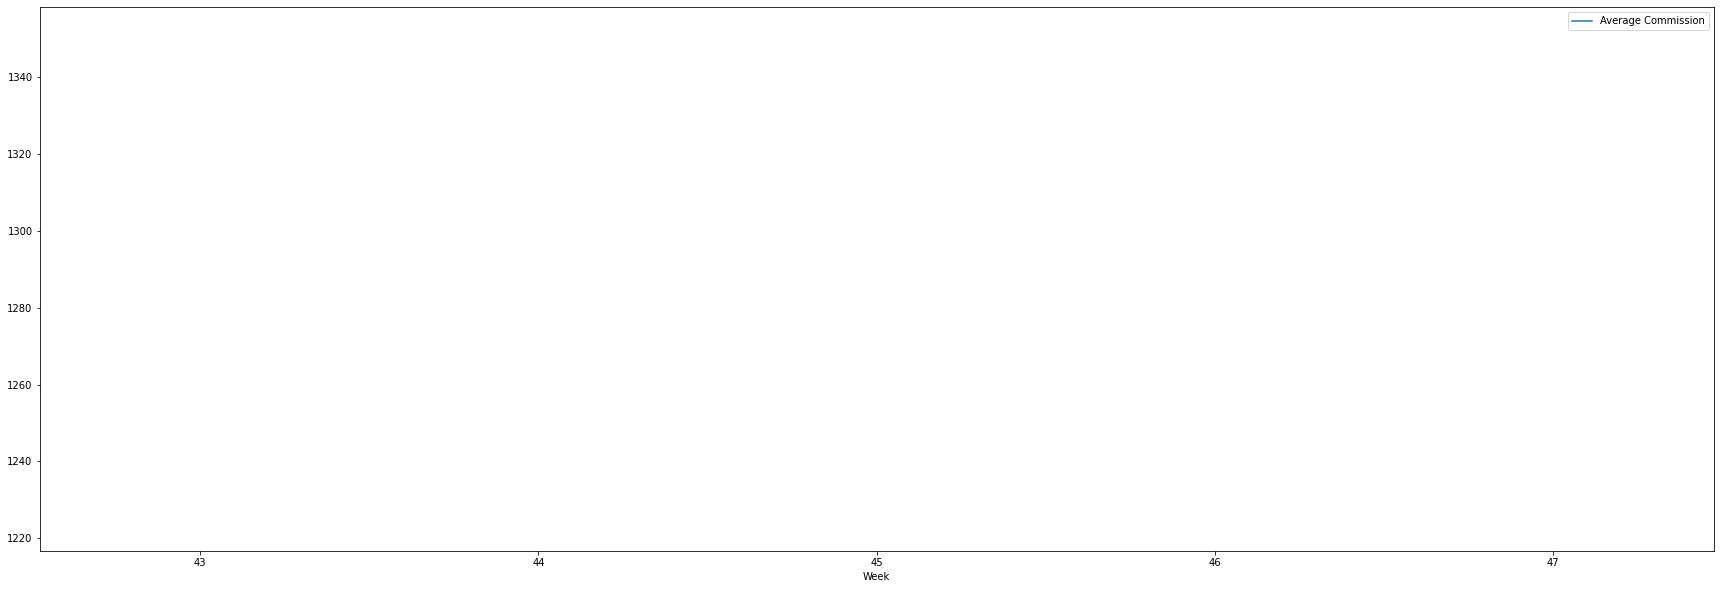

In [69]:
#getting the values for specific months
com_nov = com_mth[com_mth['Month']==11]
com_nov = com_nov.sort_values(by='Week')
com_nov = com_nov.drop(columns=['Month'])
com_nov

#getting the values for each week
wk1 = com_nov[com_nov['Week']=='1']
wk1


d = {'Week': [45], 
     'Average Commission': [ wk1['Commision Earned'].mean()]}

novAvgComm = pd.DataFrame(data=d)
novAvgComm
novAvg_graph = novAvgComm.plot.line(x='Week', y='Average Commission', figsize=(30,10))

In [70]:
com_nov.min()
com_nov.max()

Week                                      1
fscName                       David Onyunde
serviceProviderName               Naoh Rono
serviceProvided              Other Services
type                               Spraying
Acres/ Bags/Samples/Pumps               9.0
Commision Earned                      450.0
Value                                5850.0
Total                                   2.0
dtype: object

Week                                      1
fscName                      Samuel Nyapola
serviceProviderName                     SSP
serviceProvided              Other Services
type                               Spraying
Acres/ Bags/Samples/Pumps              29.0
Commision Earned                     2900.0
Value                               15600.0
Total                                   2.0
dtype: object

In [71]:
#Find the number of services provided in the month for each type
com_nov.groupby('type')['fscName'].nunique()

type
Spraying    4
Name: fscName, dtype: int64

In [72]:
# FINAL QUARTER AVERAGE<a class="anchor" id="fiqa"></a>

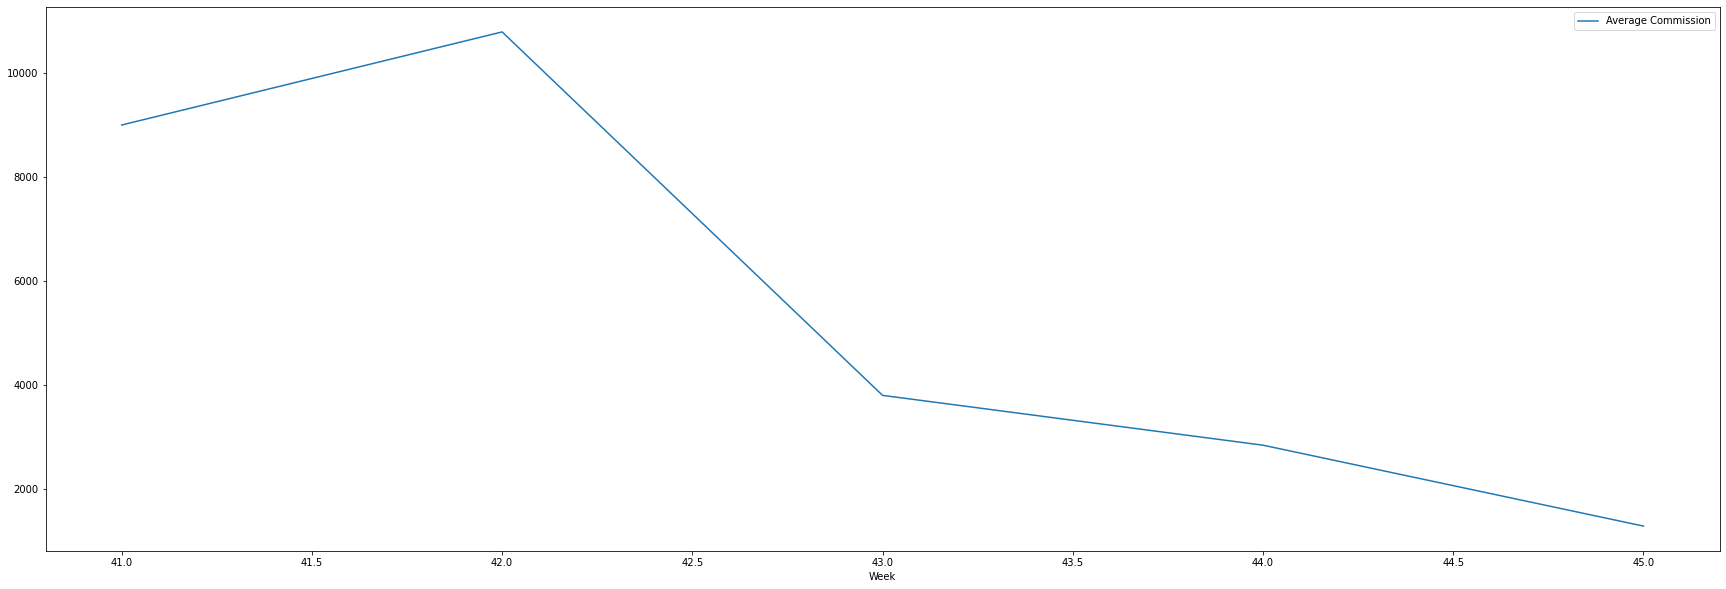

In [73]:
finQuarter = [octAvgComm, novAvgComm]

finQ = pd.concat(finQuarter)

finQgraph = finQ.plot.line(x='Week', y='Average Commission', figsize=(30,10))

# FULL YEAR AVERAGE<a class="anchor" id="fya"></a>

,Week,Average Commission
0,1,2100.000000
1,2,1925.000000
2,3,1526.923077
3,4,2212.500000
4,5,1384.210526
0,6,1640.000000
1,7,1700.000000
2,8,2111.153846
3,9,2803.472222
0,10,2671.311475


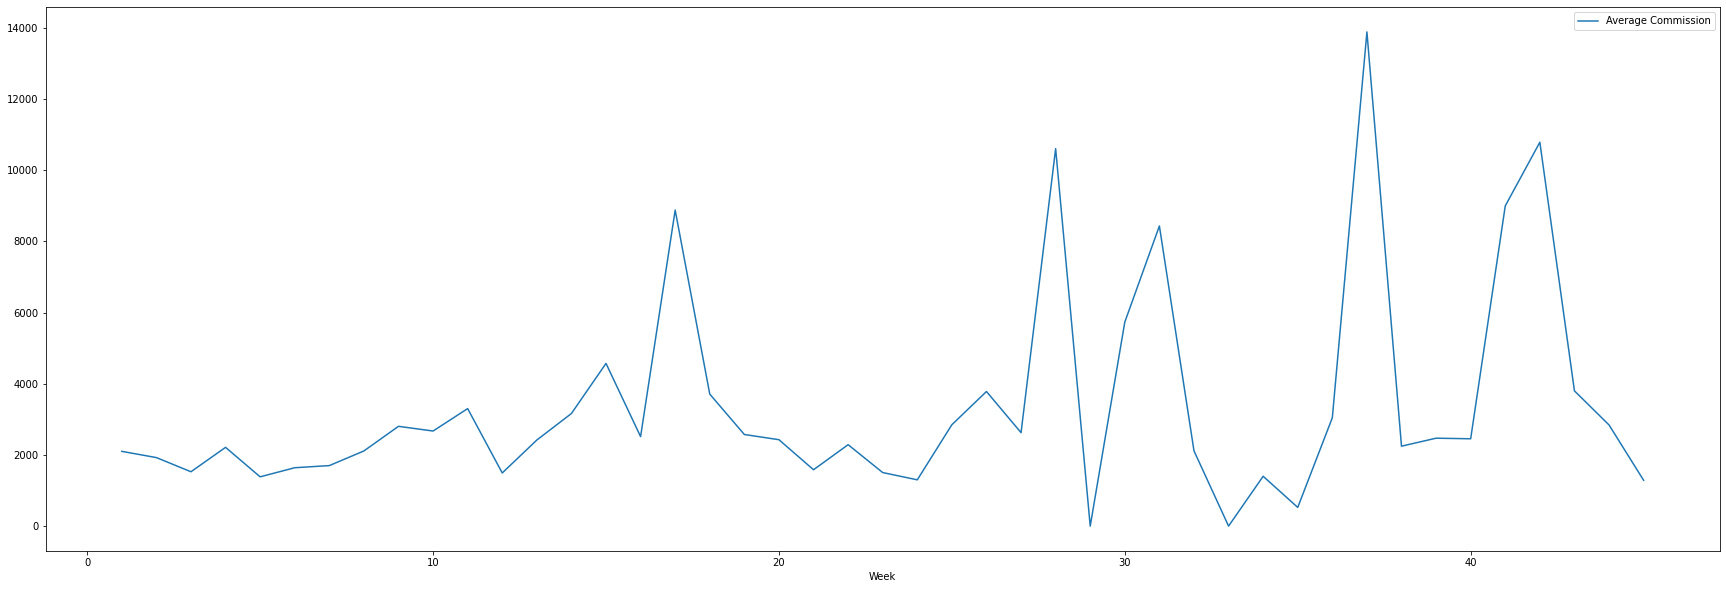

In [74]:
fya = pd.concat([janAvgComm, febAvgComm, marAvgComm, aprAvgComm, mayAvgComm, junAvgComm, julAvgComm, augAvgComm, sepAvgComm, octAvgComm, novAvgComm])
fya

fyaGraph = fya.plot.line(x='Week', y='Average Commission', figsize=(30,10))

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Week', ylabel='Average Commission'>

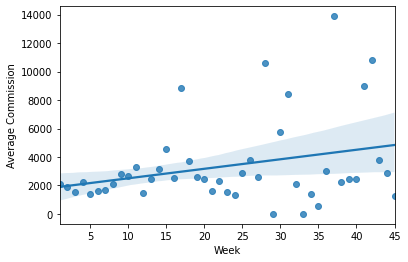

In [75]:
sns.regplot(fya['Week'],fya['Average Commission'])

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Week', ylabel='Average Commission'>

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.,
        14000., 16000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 1.0, 'Average Commission earned by FSC through the year (Mechanization)')

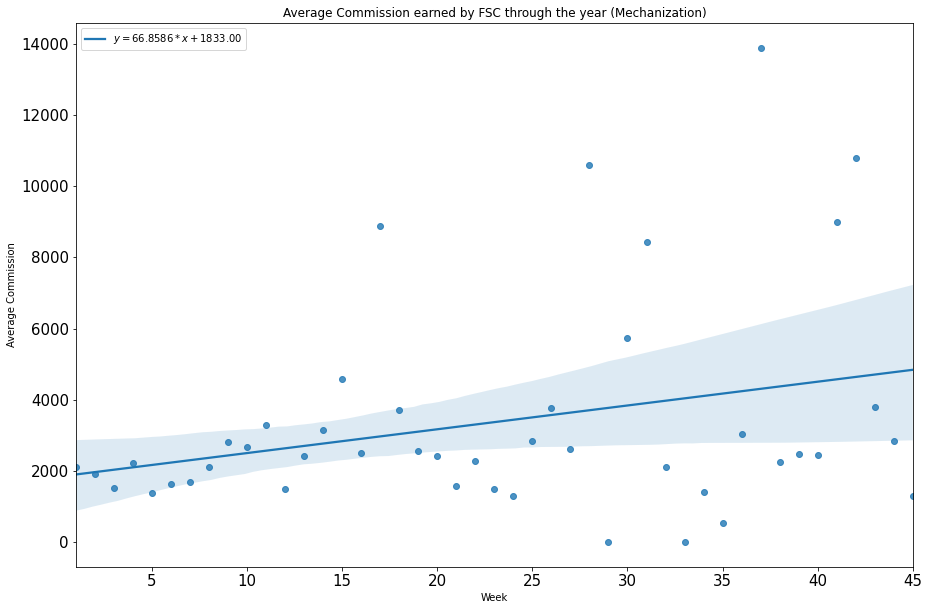

In [76]:
fig, ax = plt.subplots(figsize=(15,10))
slope, intercept, r_value, pv, se = stats.linregress(fya['Week'], fya['Average Commission'])
sns.regplot(fya['Week'], fya['Average Commission'], line_kws={'label':'$y=%3.7s*x+%3.7s$'%(slope, intercept)})
plt.xticks(fontsize=15)
plt.legend()
plt.yticks(fontsize=15)
plt.title("Average Commission earned by FSC through the year (Mechanization)")